<h4>NOTE: Majority of observations are around 1 or low level of observations (probably cause its easier to observe). Causes skew to statistical metrics such as correlation etc. Important to pair correlation with the graphs for accurate depiction of trend

<h3>IMPORT

In [254]:
import pandas as pd

storkdata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\Stork 2001-2020.csv")
storkdata = storkdata[["OBSERVATION COUNT","COUNTRY","LATITUDE","LONGITUDE","OBSERVATION DATE"]]
popdata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\CleanedData\PopulationData.csv")
turbinedata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\CleanedData\WindTurbineData.csv")
flightdata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\CleanedData\FlightData.csv")

In [255]:
from IPython.display import display 

display(storkdata.head())
display(popdata.head())
display(turbinedata.head())
display(flightdata.head())


,OBSERVATION COUNT,COUNTRY,LATITUDE,LONGITUDE,OBSERVATION DATE
0,2,Spain,40.813819,-5.705139,2001-04-29
1,1,Spain,40.813819,-5.705139,2001-06-10
2,3,Spain,42.212204,-2.180776,2001-06-20
3,4,Spain,41.728994,-5.595362,2001-04-28
4,X,Spain,41.728994,-5.595362,2001-06-02


,Country,Year,Population
0,Afghanistan,1975,12185168.7
1,Afghanistan,1980,12516846.7
2,Afghanistan,1985,10548339.5
3,Afghanistan,1990,10733987.7
4,Afghanistan,1995,16453396.5


,Capacity (MW),Status,Start Year,Latitude,Longitude
0,10.0,Operating,2014.0,28.4624,-0.0576
1,1100.0,Construction,2026.0,26.2540,29.2675
2,10000.0,Accounced,-1.0,26.5583,31.6773
3,160.0,Construction,-1.0,29.6607,32.3314
4,502.0,Construction,2025.0,28.1338,33.2602


,Country Name,Year,Flights
0,United States,1976,223017296.0
1,East Asia & Pacific,1993,221775804.0
2,East Asia & Pacific (excluding high income),2005,220887277.0
3,East Asia & Pacific (IDA & IBRD countries),2005,220785964.0
4,Low & middle income,1994,220249900.0


<h3> CLEAN

In [256]:
storkdata["COUNTRY"].value_counts()


COUNTRY
Spain                      103580
Portugal                    53114
Türkiye                     13345
Germany                      9984
Israel                       8058
                            ...  
San Marino                      1
Myanmar                         1
Bahrain                         1
Tajikistan                      1
Vatican City (Holy See)         1
Name: count, Length: 114, dtype: int64

In [257]:
before = storkdata.shape

countries that are registered only once will not be able to have deltas calculated as only one instance is recorded so no differences can be registered therefore shall be removed

In [258]:
countryduplicates = ((storkdata["COUNTRY"].value_counts()!=1)[(storkdata["COUNTRY"].value_counts()!=1) == True])

storkdata = storkdata[storkdata["COUNTRY"].isin(countryduplicates.index)]

storkdata.shape[0]-before[0]

-12

9 countries were dropped that did not have multiple logged dates of birds

In [259]:
storkdata["OBSERVATION COUNT"]

0         2
1         1
2         3
3         4
4         X
         ..
251241    2
251242    4
251243    4
251244    2
251245    1
Name: OBSERVATION COUNT, Length: 251234, dtype: object

There are "X" values here that need to be removed

In [260]:
storkdata=storkdata[(storkdata["OBSERVATION COUNT"]!="X")]
storkdata.sort_values("OBSERVATION DATE")

,OBSERVATION COUNT,COUNTRY,LATITUDE,LONGITUDE,OBSERVATION DATE
1873,30,Germany,49.484178,8.493905,2001-01-01
1566,2,Spain,43.500726,-5.761943,2001-01-02
355,9,United Arab Emirates,25.723957,55.855553,2001-01-02
1335,4,Spain,42.063687,-1.605220,2001-01-03
20,1,Italy,37.323112,14.952587,2001-01-06
...,...,...,...,...,...
247720,5,Spain,40.312752,-3.528526,2020-06-30
244867,4,Germany,50.434419,8.900663,2020-06-30
235154,1,Netherlands,53.045205,6.657515,2020-06-30
226651,8,Hungary,47.322592,21.569810,2020-06-30


Observation dates at the start must be removed

In [261]:
#storkdata = storkdata.drop([4265,6058,3557],axis=0)

In [262]:
storkdata["OBSERVATION COUNT"]=storkdata["OBSERVATION COUNT"].astype("int")

In [263]:
storkdata["OBSERVATION DATE"]= pd.to_datetime(storkdata["OBSERVATION DATE"])
storkdata["OBSERVATION DATE"]=storkdata["OBSERVATION DATE"].dt.year

In [264]:
from copy import deepcopy
storkdata_total = deepcopy(storkdata)

In [265]:
storkdata = storkdata.groupby(["COUNTRY","OBSERVATION DATE"])["OBSERVATION COUNT"].mean()

In [266]:
storkdata=pd.DataFrame(storkdata)
storkdata

OBSERVATION COUNT
COUNTRY  OBSERVATION DATE                   
Albania  2013                       2.000000
         2015                       3.000000
         2017                       1.000000
         2019                       3.500000
         2020                       5.000000
...                                      ...
Zimbabwe 2016                       2.400000
         2017                      17.950000
         2018                       3.307692
         2019                       4.450000
         2020                       1.500000

[1267 rows x 1 columns]

(np.float64(0.0), np.float64(2000.0), np.float64(0.0), np.float64(400.0))

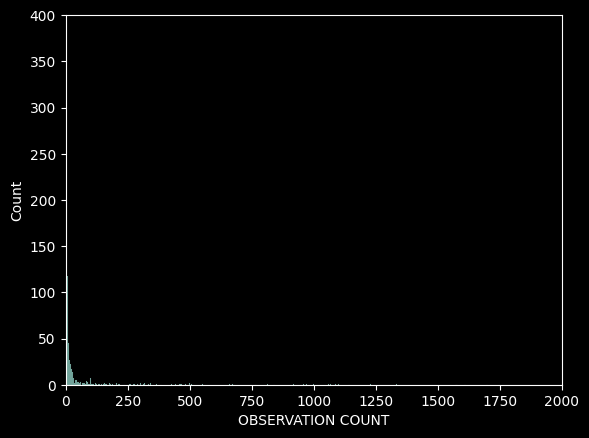

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(storkdata["OBSERVATION COUNT"])
plt.axis([0,2000,0,400])

Obvious skew. Most of the sightings are single ammounts of the bird

<h1> POPULATION DATA COMPARISON

In [268]:
popdata=popdata.groupby(["Country","Year"])["Population"].mean()
#popdata.get_group() #to access individual rows
popdata = pd.DataFrame(popdata)
popdata

Population
Country     Year            
Afghanistan 1975  12185168.7
            1980  12516846.7
            1985  10548339.5
            1990  10733987.7
            1995  16453396.5
...                      ...
Zimbabwe    2000  11831511.7
            2005  12223233.2
            2010  12840998.2
            2015  14157998.4
            2020  15672870.9

[2500 rows x 1 columns]

In [269]:
popdata["Population"]["Afghanistan"]

Year
1975    12185168.7
1980    12516846.7
1985    10548339.5
1990    10733987.7
1995    16453396.5
2000    19574996.0
2005    24436927.0
2010    28208919.0
2015    33760564.5
2020    38965918.5
Name: Population, dtype: float64

In [270]:
popstorkdata = storkdata.join(popdata,on=["COUNTRY","OBSERVATION DATE"],how="inner")
popstorkdata


OBSERVATION COUNT   Population
COUNTRY  OBSERVATION DATE                                
Albania  2015                       3.000000   2882256.19
         2020                       5.000000   2866696.10
Algeria  2015                      20.376471  39544078.00
         2020                      92.571429  43453163.00
Andorra  2015                       4.000000     71599.21
...                                      ...          ...
Zambia   2010                       1.000000  13802051.50
         2015                     171.000000  16261845.50
         2020                      24.000000  18944450.70
Zimbabwe 2015                     101.000000  14157998.40
         2020                       1.500000  15672870.90

[255 rows x 2 columns]

1845 before. 325 after. Not much overlapping years

<h2> SET LOWER BOUND YEAR HERE

In [271]:
LOWERBOUNDYEAR = 2000

popstorkdata = popstorkdata.reset_index()
popstorkdata = popstorkdata[popstorkdata["OBSERVATION DATE"]>LOWERBOUNDYEAR]
popstorkdata[popstorkdata["OBSERVATION DATE"]>LOWERBOUNDYEAR]

,COUNTRY,OBSERVATION DATE,OBSERVATION COUNT,Population
0,Albania,2015,3.000000,2882256.19
1,Albania,2020,5.000000,2866696.10
2,Algeria,2015,20.376471,39544078.00
3,Algeria,2020,92.571429,43453163.00
4,Andorra,2015,4.000000,71599.21
...,...,...,...,...
250,Zambia,2010,1.000000,13802051.50
251,Zambia,2015,171.000000,16261845.50
252,Zambia,2020,24.000000,18944450.70
253,Zimbabwe,2015,101.000000,14157998.40


Earlier years had less observations due to less people, less technology, less effort etc. Number of observations has gone up over the year. The earlier data have small values of observations, skewing the data. Limiting the lower bound to a recent time will prevent this skew

In [272]:
limit = 3
countryduplicates = (popstorkdata["COUNTRY"].value_counts()<=limit)[(popstorkdata["COUNTRY"].value_counts()<=limit) == False]

popstorkdata = popstorkdata[popstorkdata["COUNTRY"].isin(countryduplicates.index)]

In [273]:
popstorkdata

,COUNTRY,OBSERVATION DATE,OBSERVATION COUNT,Population
8,Austria,2005,1.666667,8222393.20
9,Austria,2010,2.483871,8358806.60
10,Austria,2015,3.837209,8638698.00
11,Austria,2020,2.190476,8904211.00
18,Belgium,2005,3.333333,10516367.80
...,...,...,...,...
237,Ukraine,2020,5.485507,43907118.00
238,United Arab Emirates,2005,19.117647,4258082.92
239,United Arab Emirates,2010,1.333333,8422351.50
240,United Arab Emirates,2015,1.890909,8865812.00


Down to 142 entries after removing any entries with less than 5 entries

In [274]:
popstorkdata["COUNTRY"].unique()

array(['Austria', 'Belgium', 'Botswana', 'Bulgaria', 'Croatia', 'Cyprus',
       'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Hungary', 'India', 'Israel', 'Italy',
       'Kenya', 'Latvia', 'Morocco', 'Netherlands', 'Norway', 'Oman',
       'Poland', 'Portugal', 'Romania', 'Senegal', 'Serbia', 'Slovakia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Tanzania',
       'Tunisia', 'Uganda', 'Ukraine', 'United Arab Emirates'],
      dtype=object)

In [275]:
popstorkdata=popstorkdata.set_index(["COUNTRY","OBSERVATION DATE"])

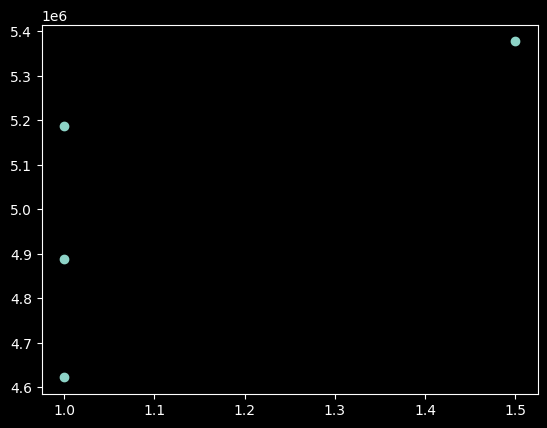

In [276]:
import matplotlib.pyplot as plt

#Example of norway
country = "Norway"
plt.scatter(popstorkdata["OBSERVATION COUNT"][country],popstorkdata["Population"][country])

In [277]:
corrs = popstorkdata.reset_index()[["COUNTRY","OBSERVATION COUNT","Population"]].groupby("COUNTRY").corr()
corrs = corrs.reset_index().drop(["level_1","OBSERVATION COUNT"],axis=1)
corrs = corrs[corrs["Population"]!=1]
corrs.columns = pd.Index(["Country","Correlation"])
corrs

,Country,Correlation
0,Austria,0.342575
2,Belgium,-0.271910
4,Botswana,-0.219382
6,Bulgaria,0.106471
8,Croatia,0.549394
10,Cyprus,-0.279843
12,Denmark,0.231824
14,Egypt,0.428027
16,Estonia,0.645831
18,Finland,-0.697684


In [278]:
#Average difference for each country

#corrs.set_index("Country")[["Correlation"]].abs().sort_values("Correlation").head()
#corrs.sort_values("Correlation").head()
popstorkdata_diff = popstorkdata.reset_index()[["COUNTRY","OBSERVATION COUNT","Population"]].groupby("COUNTRY").diff()
popstorkdata_diff["Country"] = popstorkdata.reset_index()["COUNTRY"]
popstorkdata_diff= popstorkdata_diff.dropna()
popstorkdata_diff["stork Count per Population Change"]=popstorkdata_diff["OBSERVATION COUNT"]/popstorkdata_diff["Population"]
popstorkchange = popstorkdata_diff[["stork Count per Population Change","Country"]].groupby("Country").mean()
popstorkchange.sort_values("stork Count per Population Change").round(5) * 1000000

,stork Count per Population Change
Country,
Israel,-290.0
Spain,-170.0
Poland,-70.0
Croatia,-20.0
Hungary,-20.0
Latvia,-20.0
Portugal,-20.0
Greece,-10.0
Cyprus,-10.0


In [279]:
popstorkchange.mean() * 1000000

stork Count per Population Change    4.623863
dtype: float64

In [280]:
print("Correlation Overall Absolute Average = ",round(corrs["Correlation"].abs().mean(),3))

Correlation Overall Absolute Average =  0.482


In [281]:
print("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())

Average Negative Correlation =  -0.5529715036995133


In [282]:
print("Average Positive Correlation = ",corrs[corrs["Correlation"]>0]["Correlation"].mean())

Average Positive Correlation =  0.4211159671171827


INSERT HYPOTHESIS TEST HERE

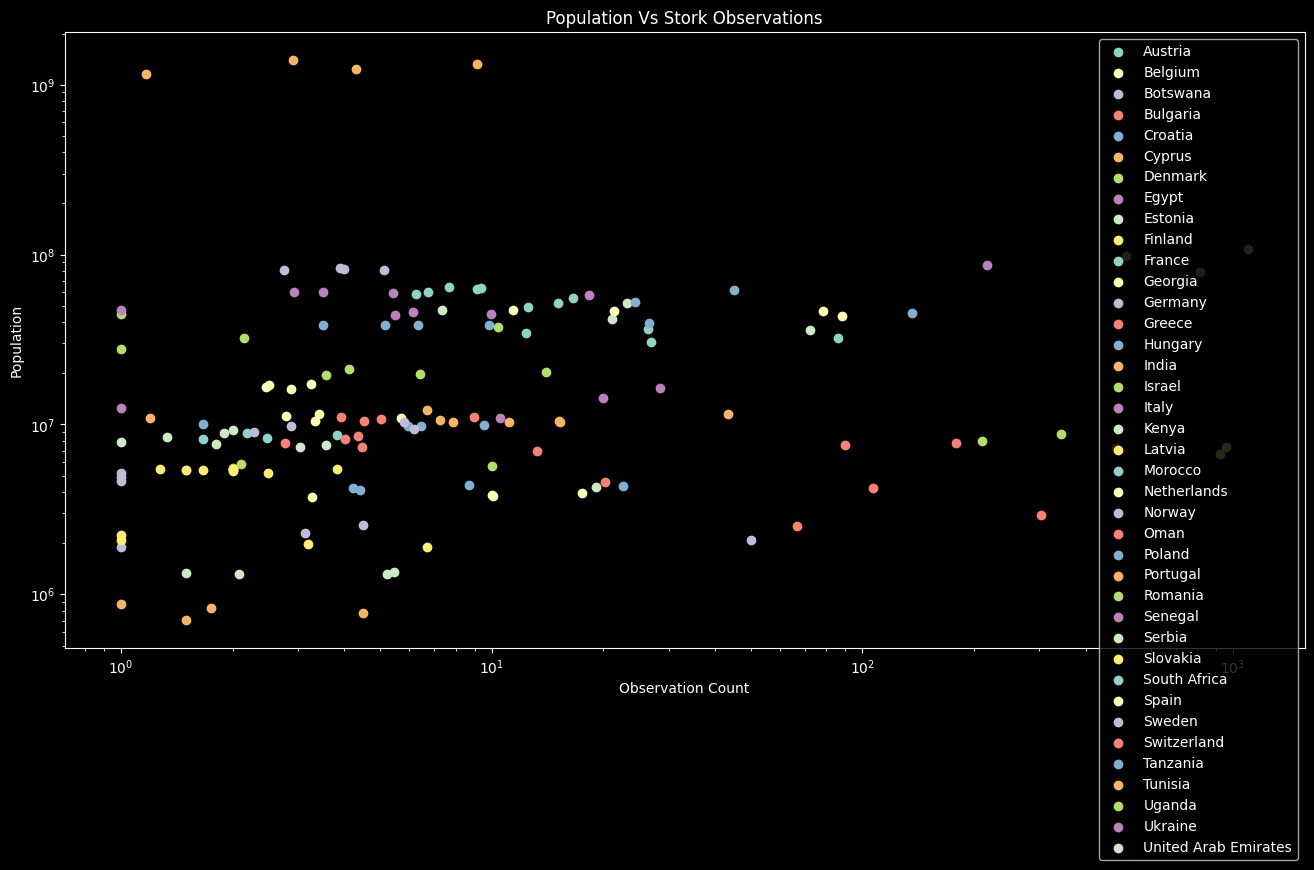

In [283]:
plt.figure(figsize=(16,8))

plt.xlabel("Observation Count")
plt.ylabel("Population")
plt.yscale("log")
plt.xscale("log")
plt.title("Population Vs Stork Observations")
for i in popstorkdata.reset_index()["COUNTRY"].unique():
    plt.scatter(popstorkdata["OBSERVATION COUNT"][i],popstorkdata["Population"][i])

plt.legend(popstorkdata.reset_index()["COUNTRY"].unique())

C:\Users\prabr\AppData\Local\Temp\ipykernel_7256\4129128024.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = (popstorkdata.groupby(pd.cut(popstorkdata['Population'], list(range(int(popstorkdata["Population"].min()),300706222,10000000)))).sum()).drop(columns="Population").reset_index()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, '(706222, 10706222]'),
  Text(1, 0, '(10706222, 20706222]'),
  Text(2, 0, '(20706222, 30706222]'),
  Text(3, 0, '(30706222, 40706222]'),
  Text(4, 0, '(40706222, 50706222]'),
  Text(5, 0, '(50706222, 60706222]'),
  Text(6, 0, '(60706222, 70706222]'),
  Text(7, 0, '(70706222, 80706222]'),
  Text(8, 0, '(80706222, 90706222]'),
  Text(9, 0, '(90706222, 100706222]'),
  Text(10, 0, '(100706222, 110706222]'),
  Text(11, 0, '(110706222, 120706222]'),
  Text(12, 0, '(120706222, 130706222]'),
  Text(13, 0, '(130706222, 140706222]'),
  Text(14, 0, '(140706222, 150706222]'),
  Text(15, 0, '(150706222, 160706222]'),
  Text(16, 0, '(160706222, 170706222]'),
  Text(17, 0, '(170706222, 180706222]'),
  Text(18, 0, '(180706222, 190706222]'),
  Text(19, 0, '(190706222, 200706222]'),
  Text(20, 0, '(200706222, 210706222]'),
  Tex

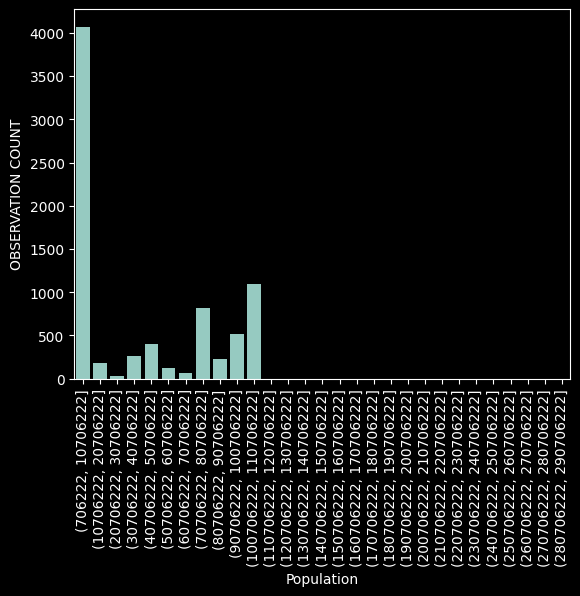

In [284]:
grouped = (popstorkdata.groupby(pd.cut(popstorkdata['Population'], list(range(int(popstorkdata["Population"].min()),300706222,10000000)))).sum()).drop(columns="Population").reset_index()

sns.barplot(data=grouped,x="Population",y="OBSERVATION COUNT")
plt.xticks(rotation=90)

obvious downtrend

C:\Users\prabr\AppData\Local\Temp\ipykernel_7256\757828011.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = (popstorkdata.groupby(pd.cut(popstorkdata['Population'], list(range(10706222,300706222,1000000)))).sum()).drop(columns="Population").reset_index()


(np.float64(0.0), np.float64(200.0), np.float64(0.0), np.float64(2000.0))

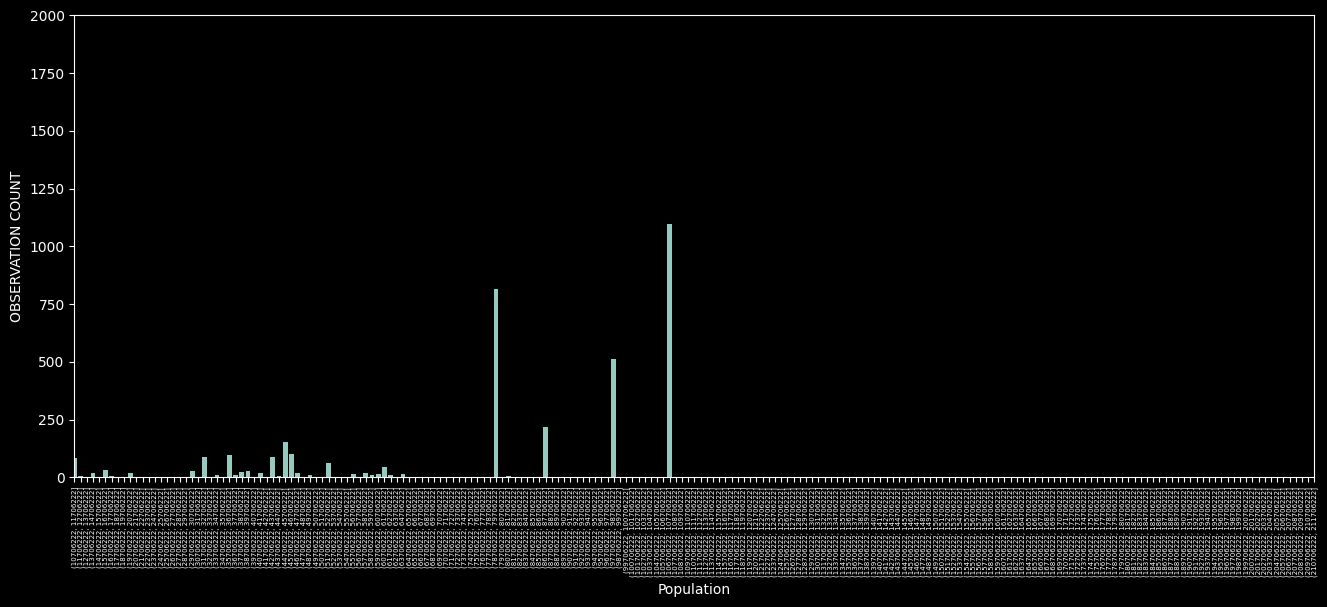

In [285]:
grouped = (popstorkdata.groupby(pd.cut(popstorkdata['Population'], list(range(10706222,300706222,1000000)))).sum()).drop(columns="Population").reset_index()

plt.figure(figsize=(16,6))
plt.xticks(rotation=90,size=5)
sns.barplot(data=grouped,x="Population",y="OBSERVATION COUNT")
plt.axis([0,200,0,2000])

no obvious trend

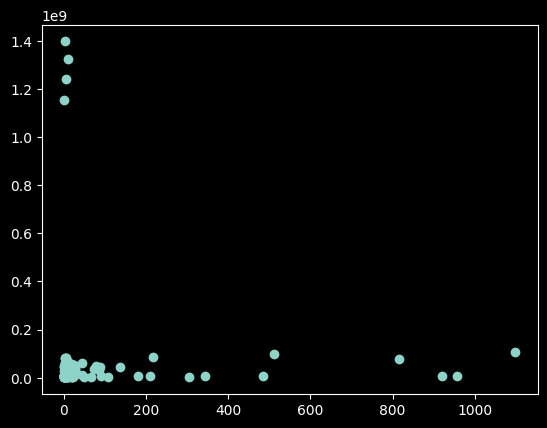

In [286]:
plt.scatter(popstorkdata[["OBSERVATION COUNT"]].values,popstorkdata[["Population"]].values)

somethings going on here, not quite a linear correlation

chunk of high population stork data at low human population


C:\Users\prabr\AppData\Local\Temp\ipykernel_7256\3601882513.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


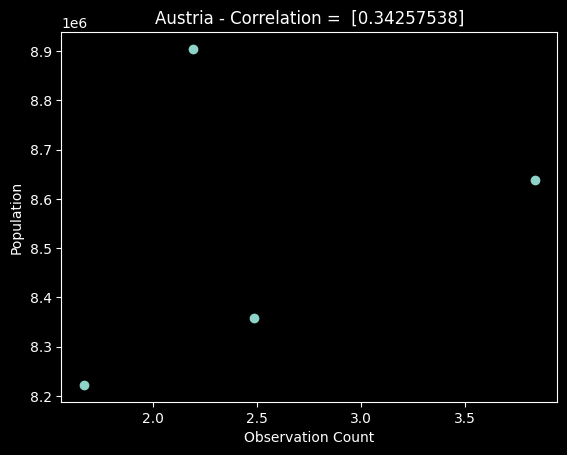

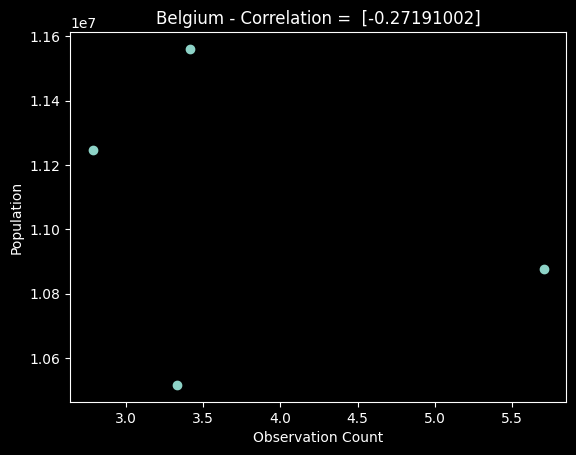

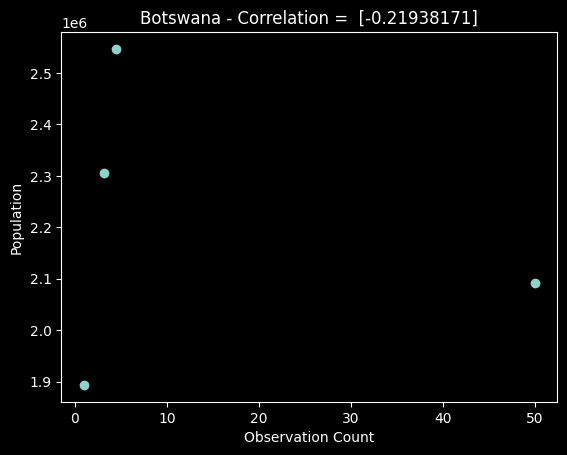

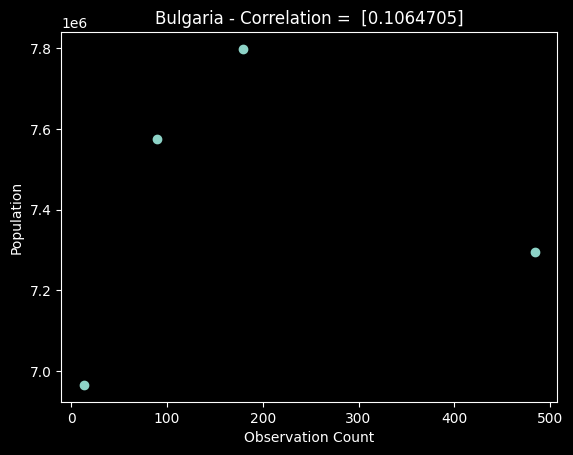

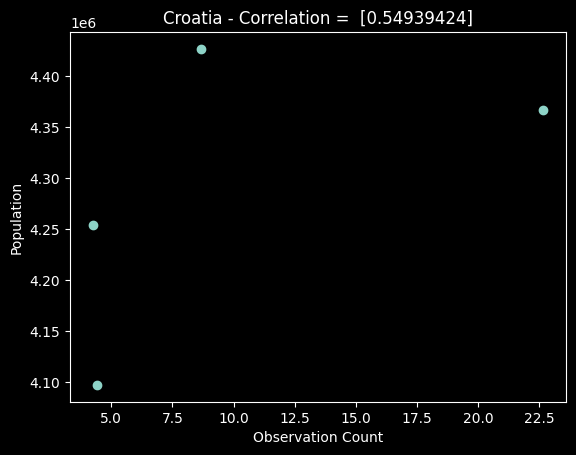

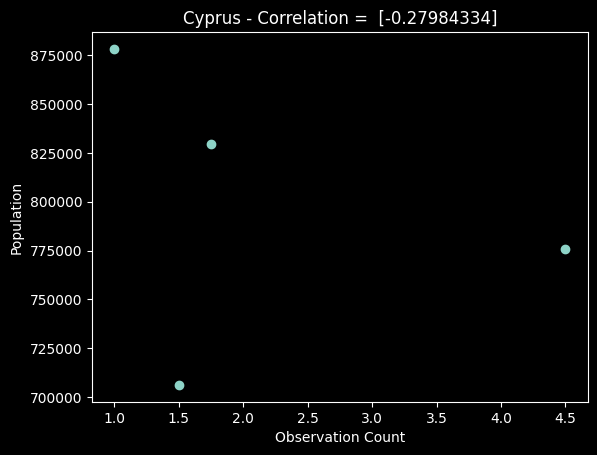

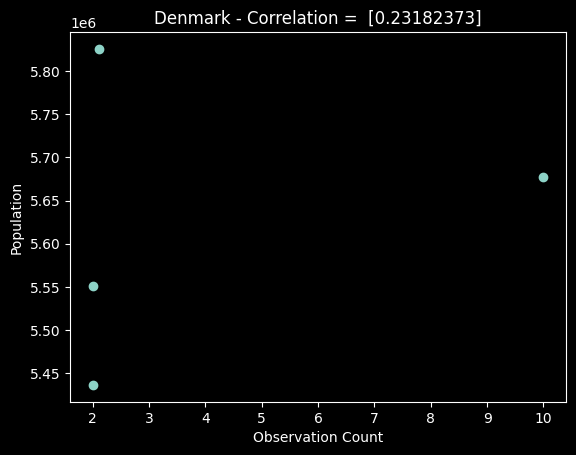

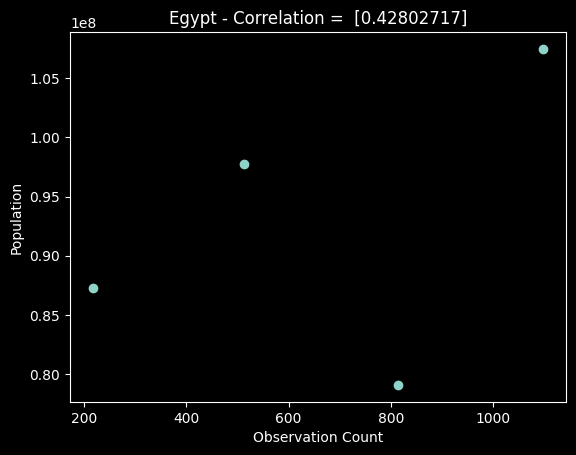

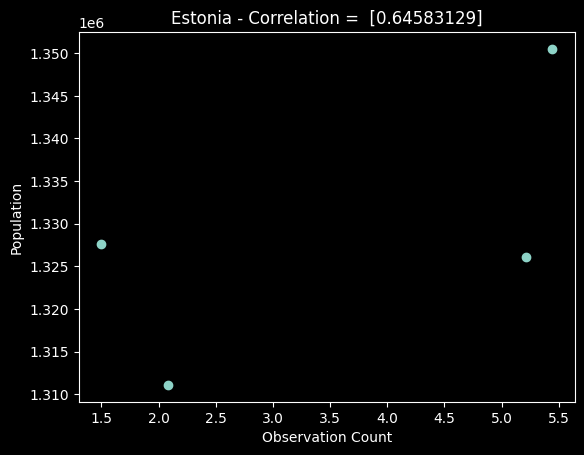

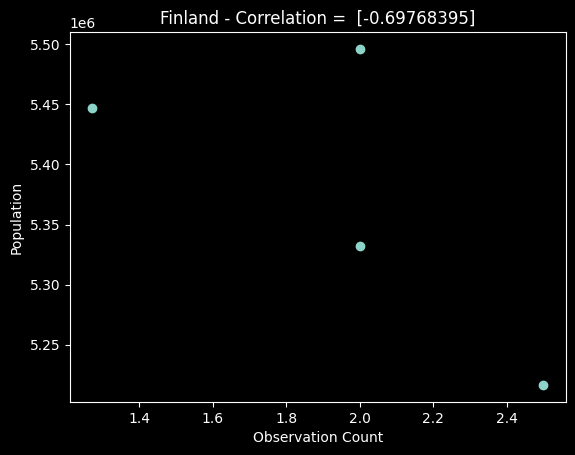

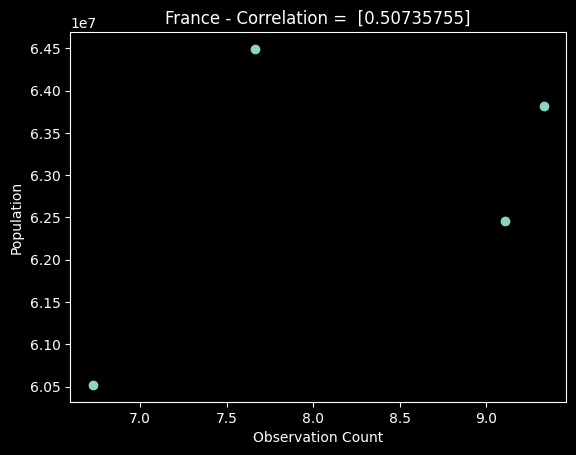

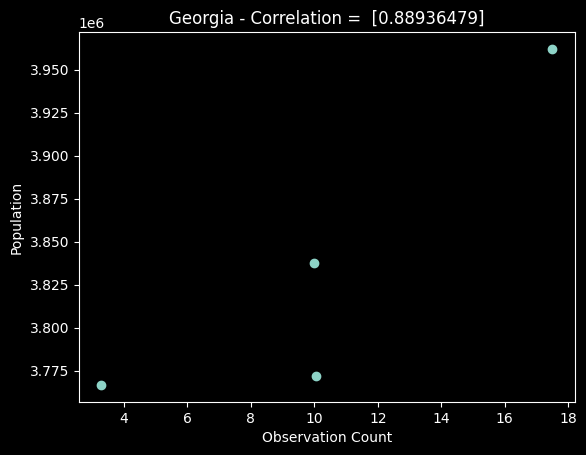

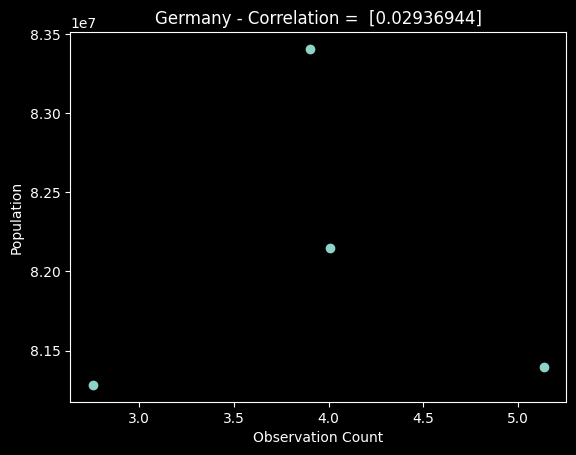

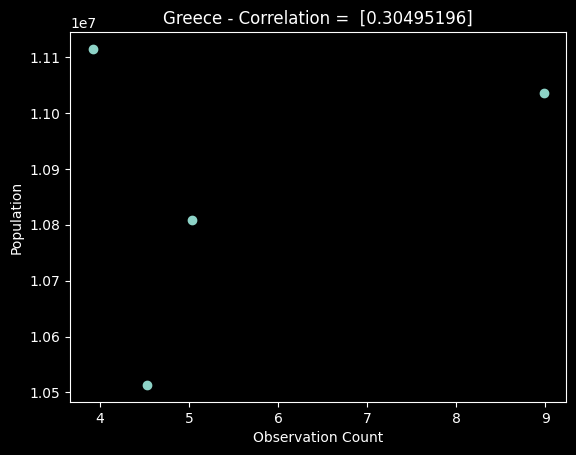

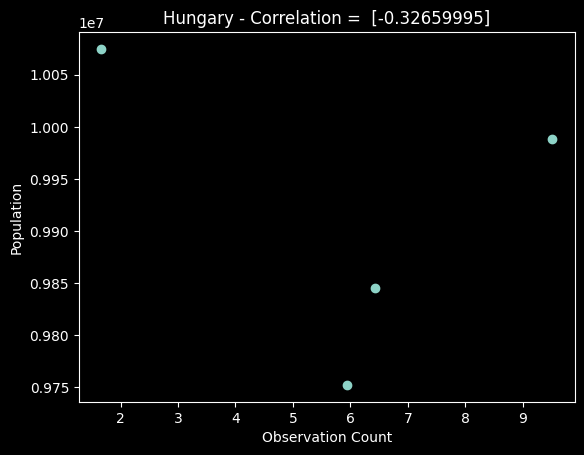

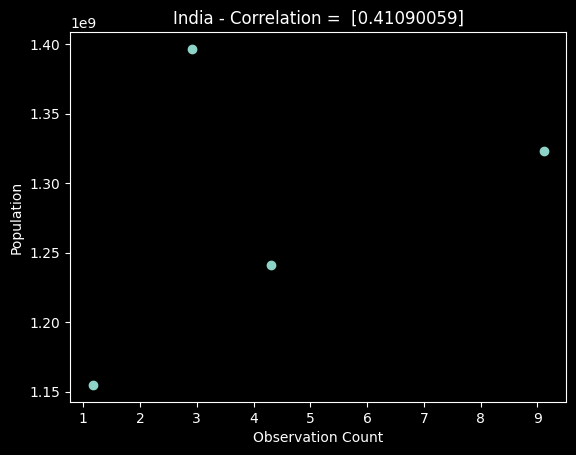

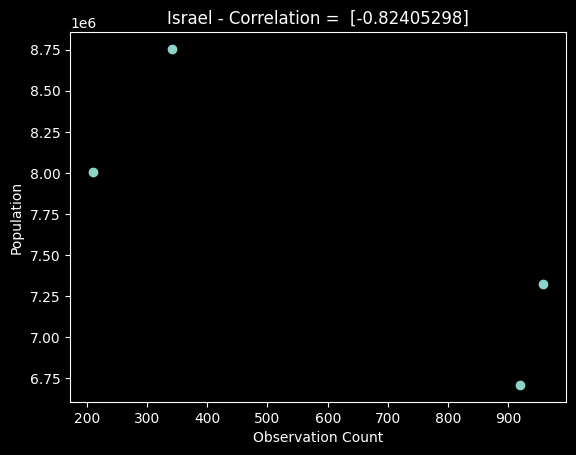

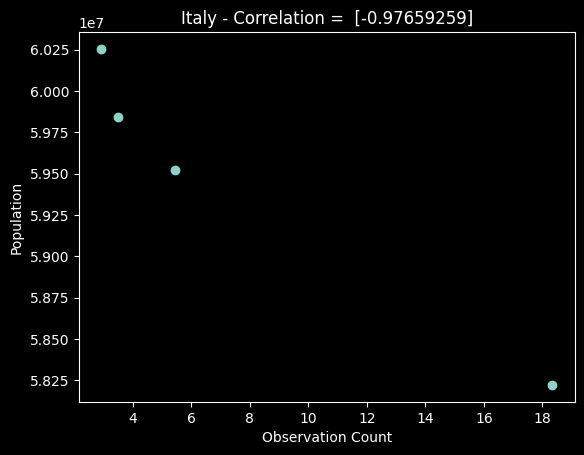

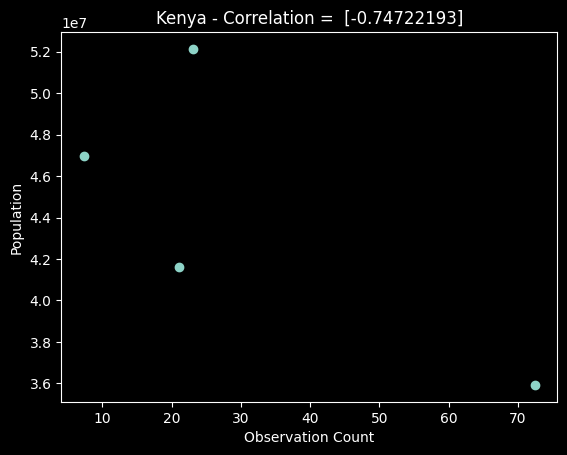

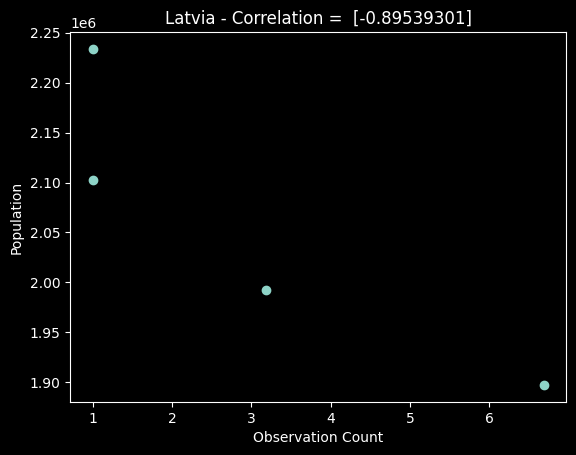

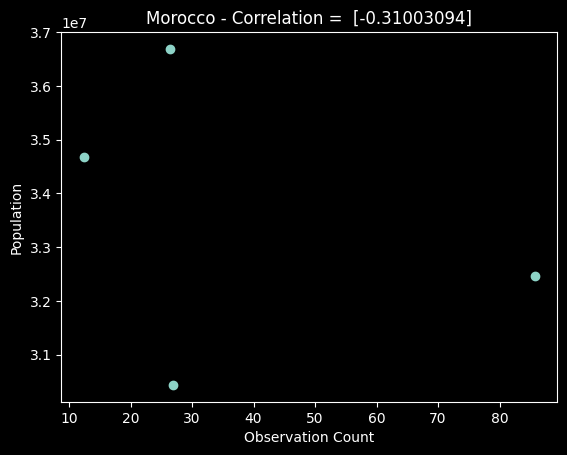

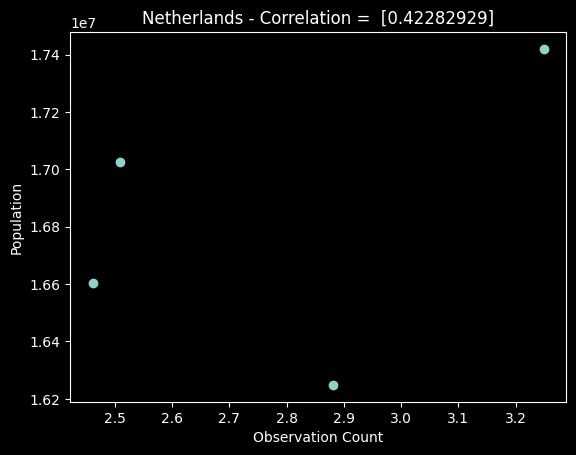

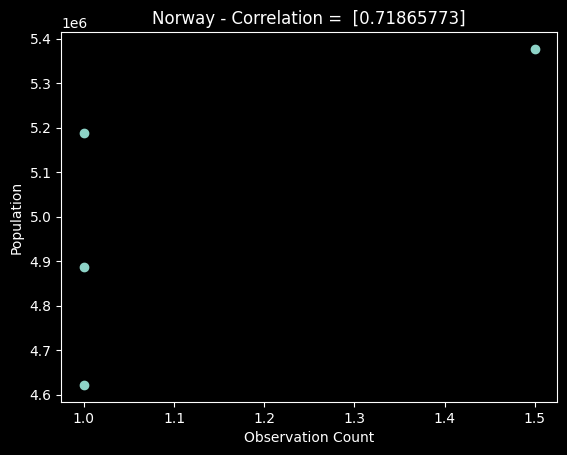

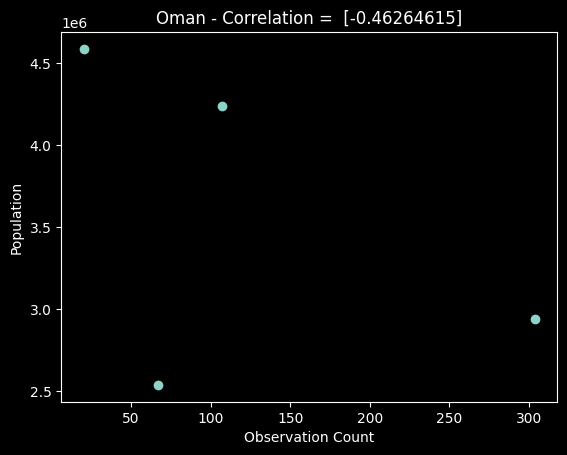

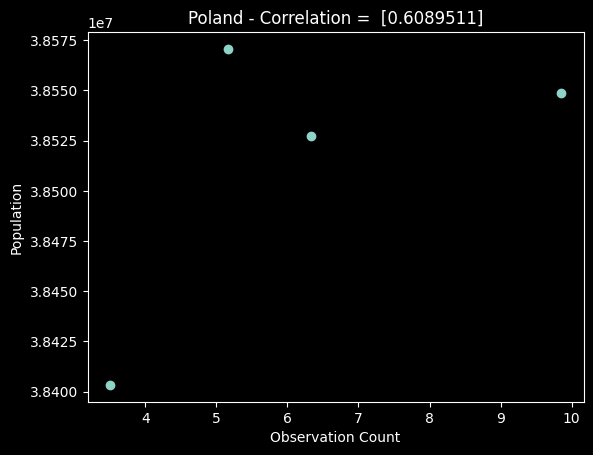

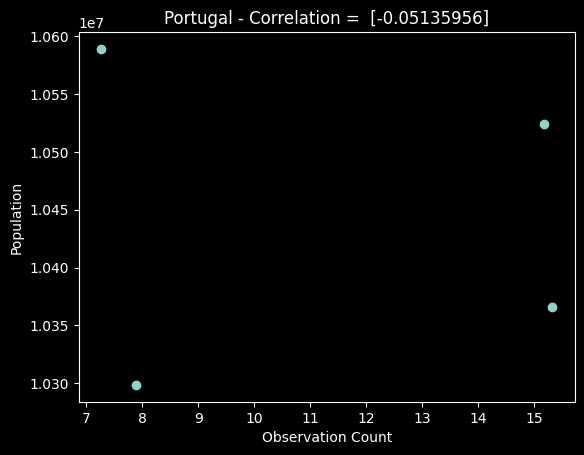

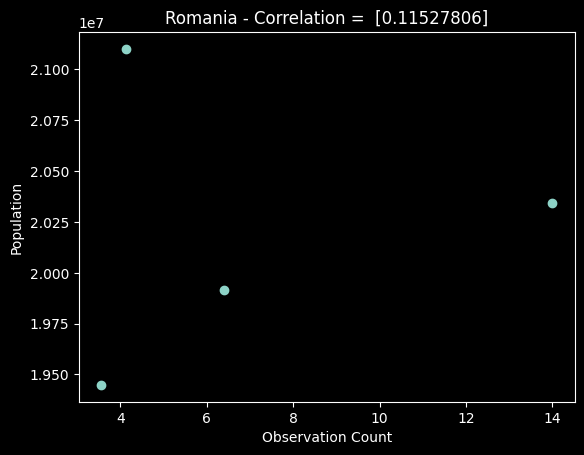

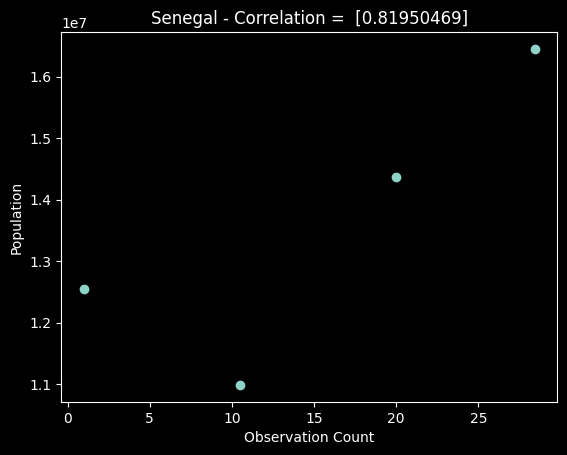

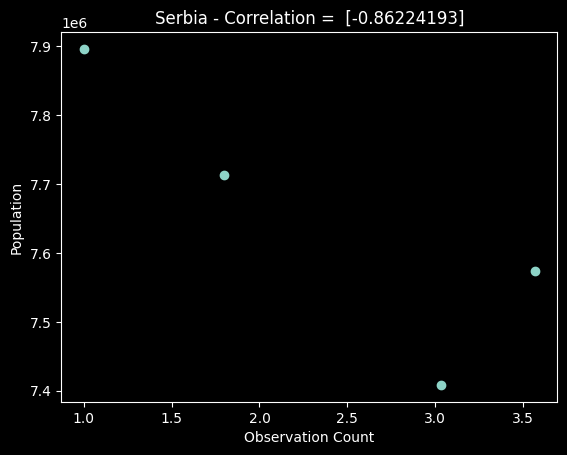

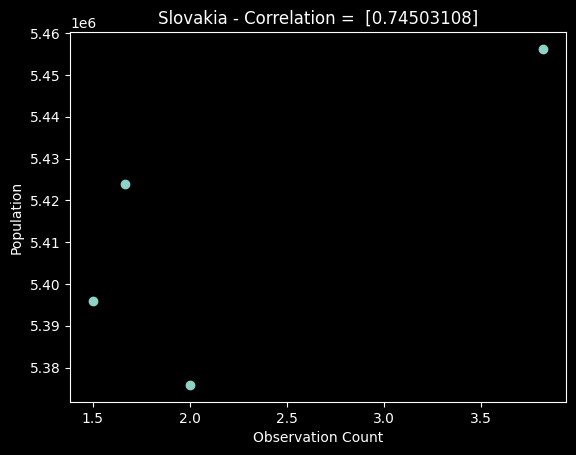

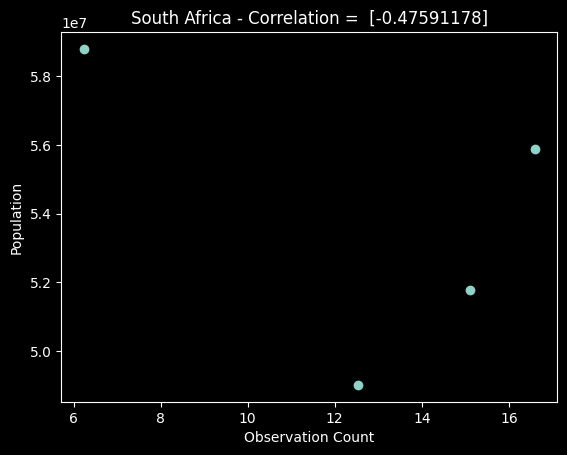

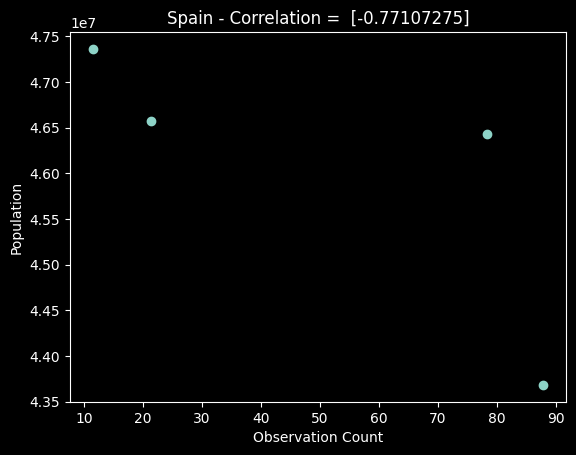

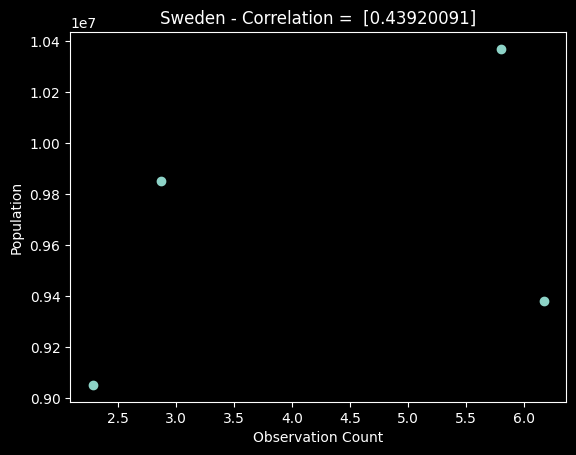

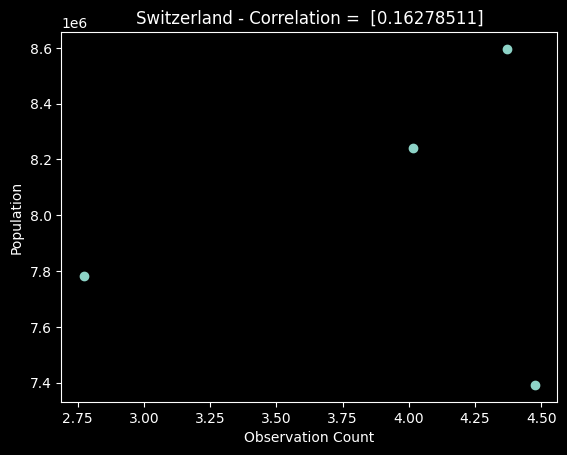

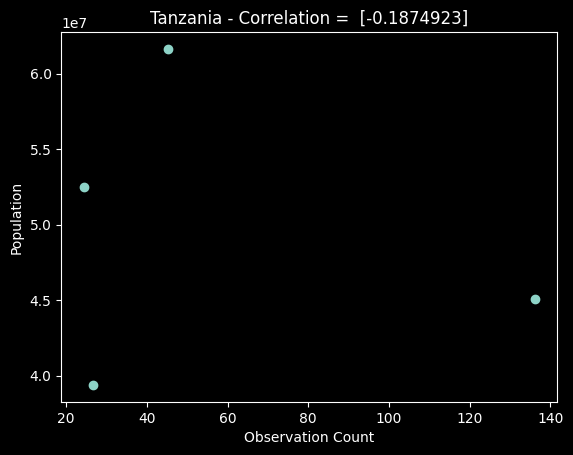

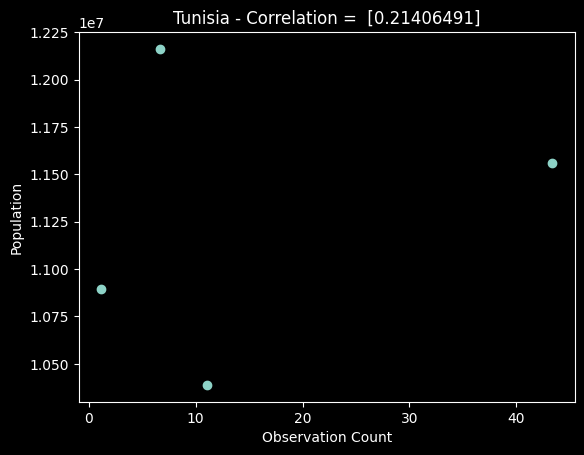

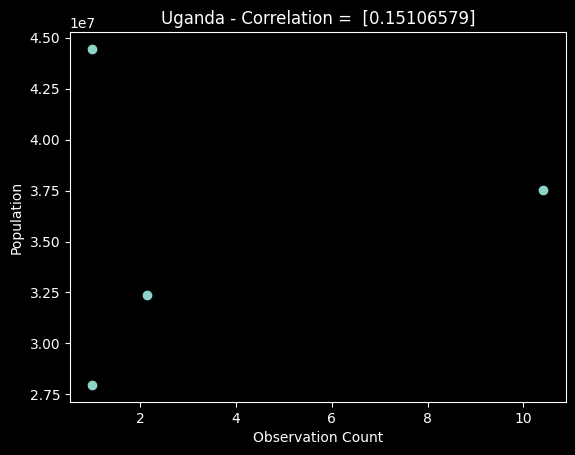

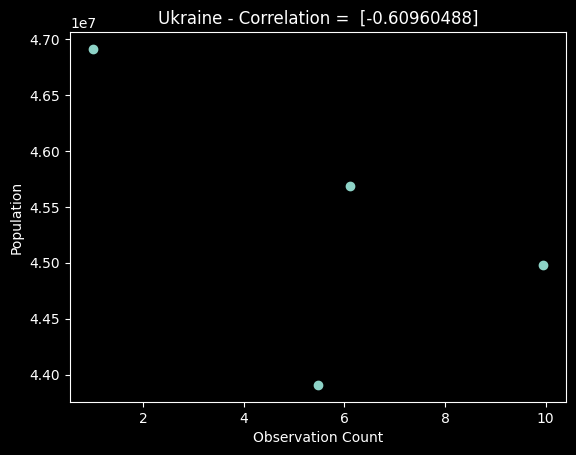

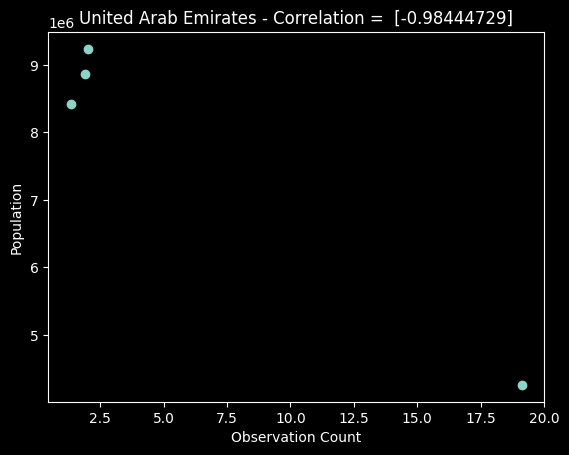

In [287]:
for i in popstorkdata.reset_index()["COUNTRY"].unique():
    plt.figure()
    correlationfig = corrs[corrs["Country"]==i]["Correlation"]
    plt.title(i + " - Correlation =  " + f"{correlationfig.values}")
    plt.xlabel("Observation Count")
    plt.ylabel("Population")
    plt.scatter(popstorkdata["OBSERVATION COUNT"][i],popstorkdata["Population"][i])
    

Text(0, 0.5, 'Normalized Value')

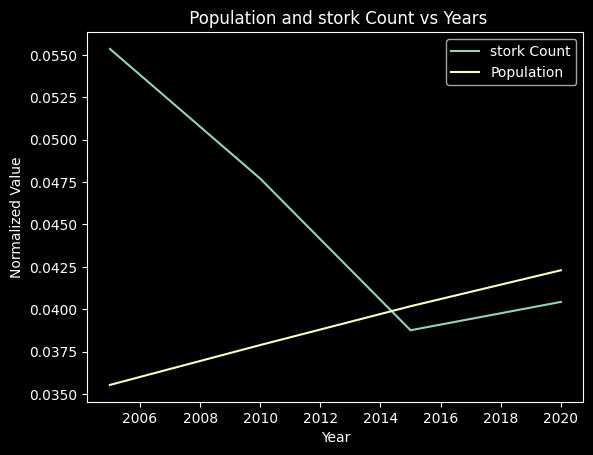

In [288]:
#Normalized the values to fit on the graph
plt.plot(popstorkdata.reset_index()[["OBSERVATION DATE","OBSERVATION COUNT","Population"]].groupby("OBSERVATION DATE").mean()["OBSERVATION COUNT"]/popstorkdata["OBSERVATION COUNT"].max(),label="stork Count")
plt.plot(popstorkdata.reset_index()[["OBSERVATION DATE","OBSERVATION COUNT","Population"]].groupby("OBSERVATION DATE").mean()["Population"]/popstorkdata["Population"].max(),label="Population")
plt.legend()
plt.title(" Population and stork Count vs Years")
plt.xlabel("Year")
plt.ylabel("Normalized Value")

In [289]:
popstorkdata.reset_index()

,COUNTRY,OBSERVATION DATE,OBSERVATION COUNT,Population
0,Austria,2005,1.666667,8222393.20
1,Austria,2010,2.483871,8358806.60
2,Austria,2015,3.837209,8638698.00
3,Austria,2020,2.190476,8904211.00
4,Belgium,2005,3.333333,10516367.80
...,...,...,...,...
151,Ukraine,2020,5.485507,43907118.00
152,United Arab Emirates,2005,19.117647,4258082.92
153,United Arab Emirates,2010,1.333333,8422351.50
154,United Arab Emirates,2015,1.890909,8865812.00


In [290]:
popstorkdata.reset_index().set_index("OBSERVATION DATE")["OBSERVATION COUNT"]

OBSERVATION DATE
2005     1.666667
2010     2.483871
2015     3.837209
2020     2.190476
2005     3.333333
          ...    
2020     5.485507
2005    19.117647
2010     1.333333
2015     1.890909
2020     2.000000
Name: OBSERVATION COUNT, Length: 156, dtype: float64

<h3> FLIGHT DATA

In [291]:

flightdata = flightdata[flightdata["Year"]>LOWERBOUNDYEAR]

In [292]:
flightdata = flightdata.set_index(["Country Name","Year"])

In [293]:
popdata

Population
Country     Year            
Afghanistan 1975  12185168.7
            1980  12516846.7
            1985  10548339.5
            1990  10733987.7
            1995  16453396.5
...                      ...
Zimbabwe    2000  11831511.7
            2005  12223233.2
            2010  12840998.2
            2015  14157998.4
            2020  15672870.9

[2500 rows x 1 columns]

In [294]:
flightstorkdata = storkdata.join(flightdata,on=["COUNTRY","OBSERVATION DATE"],how="inner")
flightstorkdata = flightstorkdata.reset_index()

In [295]:
limit = 5
countryduplicates = (flightstorkdata["COUNTRY"].value_counts()<=limit)[(flightstorkdata["COUNTRY"].value_counts()<=limit) == False]

flightstorkdata = flightstorkdata[flightstorkdata["COUNTRY"].isin(countryduplicates.index)]

flightstorkdata

,COUNTRY,OBSERVATION DATE,OBSERVATION COUNT,Flights
0,Algeria,2009,17.666667,4.370917e+06
1,Algeria,2011,2.000000,3.543663e+06
2,Algeria,2012,1.000000,4.082595e+06
3,Algeria,2013,2.000000,4.492437e+06
4,Algeria,2014,26.103448,5.021289e+06
...,...,...,...,...
787,Zimbabwe,2016,2.400000,3.788030e+05
788,Zimbabwe,2017,17.950000,2.825390e+05
789,Zimbabwe,2018,3.307692,2.825390e+05
790,Zimbabwe,2019,4.450000,3.033828e+05


In [296]:
"""corrs = flightstorkdata.reset_index()[["COUNTRY","OBSERVATION COUNT","Flights"]].groupby("COUNTRY").corr()
corrs = corrs.reset_index().drop(["level_1","OBSERVATION COUNT"],axis=1)
corrs = corrs[corrs["Flights"]!=1]
corrs.columns = pd.Index(["Country","Correlation"])
corrs = corrs.dropna()
"""

'corrs = flightstorkdata.reset_index()[["COUNTRY","OBSERVATION COUNT","Flights"]].groupby("COUNTRY").corr()\ncorrs = corrs.reset_index().drop(["level_1","OBSERVATION COUNT"],axis=1)\ncorrs = corrs[corrs["Flights"]!=1]\ncorrs.columns = pd.Index(["Country","Correlation"])\ncorrs = corrs.dropna()\n'

In [297]:
"""print("Correlation Overall Absolute Average = ",round(corrs["Correlation"].abs().mean(),3))
print("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())
print("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())"""

'print("Correlation Overall Absolute Average = ",round(corrs["Correlation"].abs().mean(),3))\nprint("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())\nprint("Average Negative Correlation = ",corrs[corrs["Correlation"]<0]["Correlation"].mean())'

In [298]:
flightstorkdata = flightstorkdata.set_index(["COUNTRY","OBSERVATION DATE"])


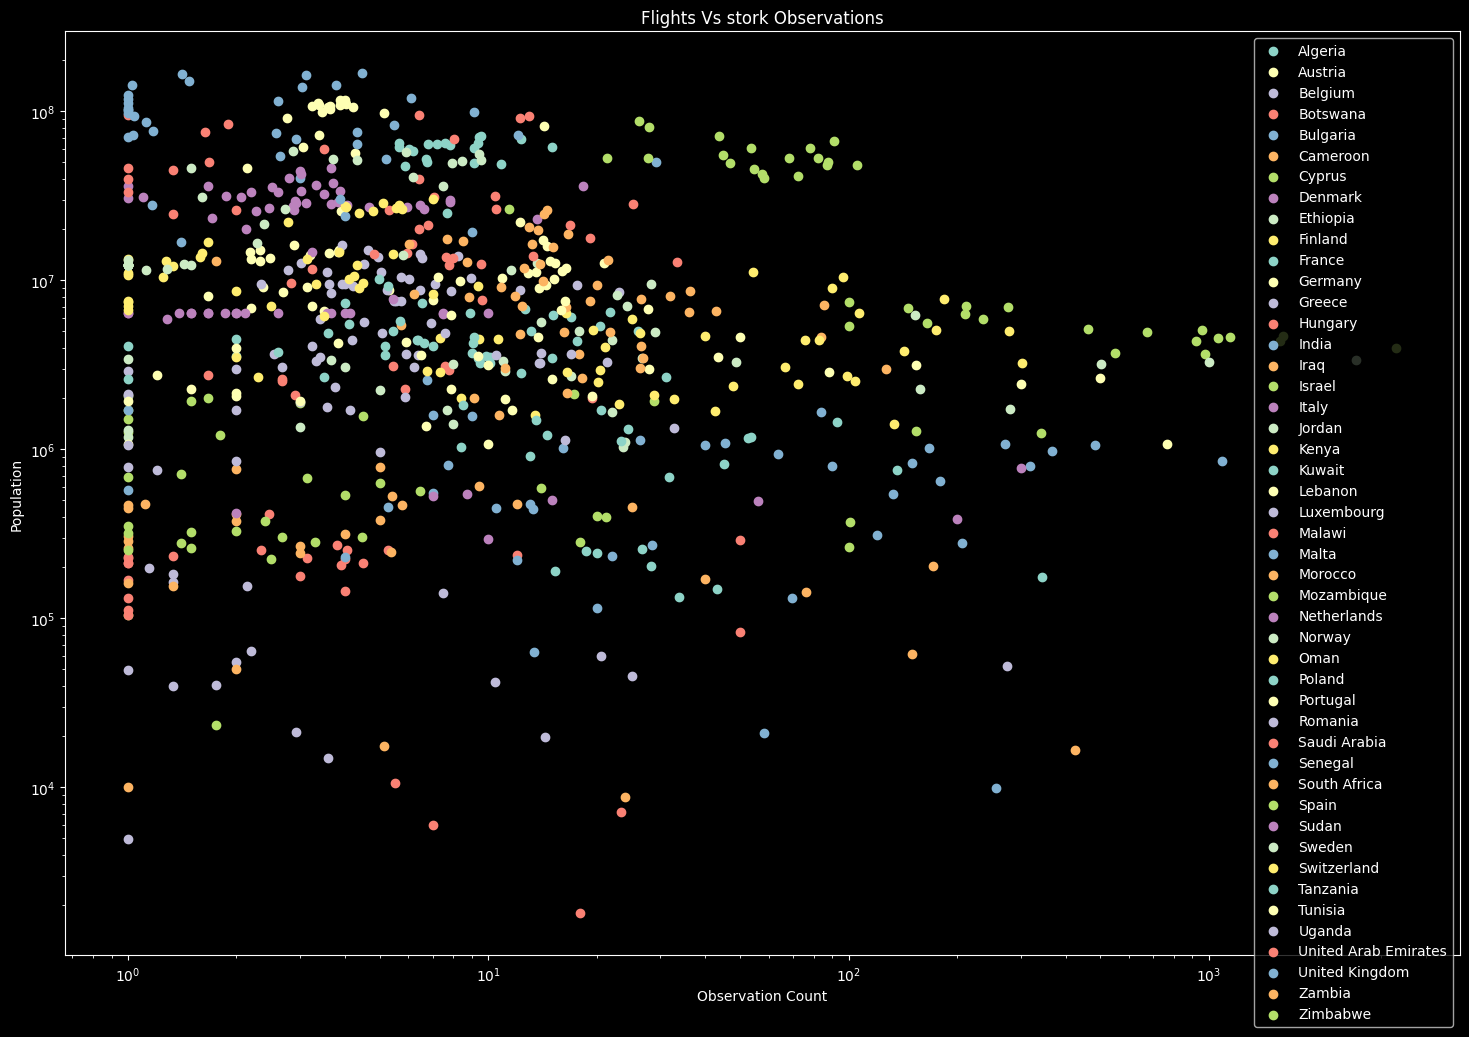

In [299]:

plt.figure(figsize=(18,12))

plt.xlabel("Observation Count")
plt.ylabel("Population")
plt.yscale("log")
plt.xscale("log")
plt.title("Flights Vs stork Observations")
for i in flightstorkdata.reset_index()["COUNTRY"].unique():
    plt.scatter(flightstorkdata["OBSERVATION COUNT"][i],flightstorkdata["Flights"][i])

plt.legend(flightstorkdata.reset_index()["COUNTRY"].unique())

The data is skewed by ratings of 1 observation or low ammounts of observations and so does not really show an overall trend. 

There is enough data to use z score to remove outliers and reveal the overall trend without the skew.

Removing the skew will allow us to have a more accurate correlation. Instead of doing correlation near the start, it will be done after the data is cleaned

In [300]:

flightstorkdata=flightstorkdata.reset_index()


C:\Users\prabr\AppData\Local\Temp\ipykernel_7256\2417204526.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


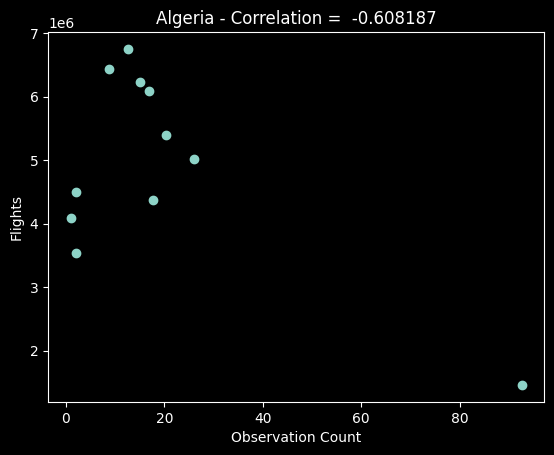

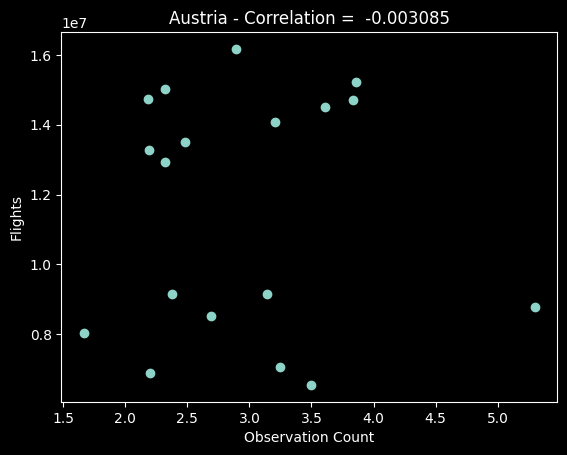

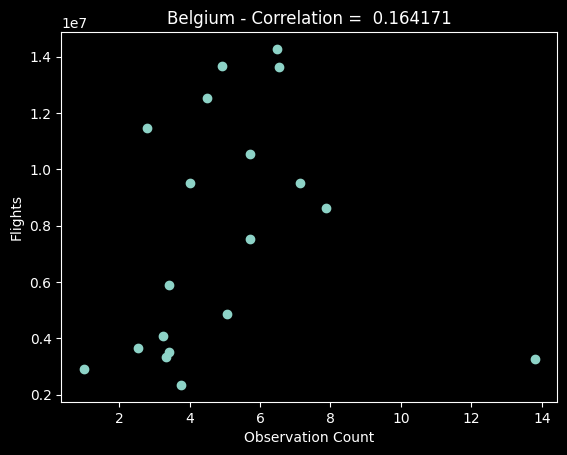

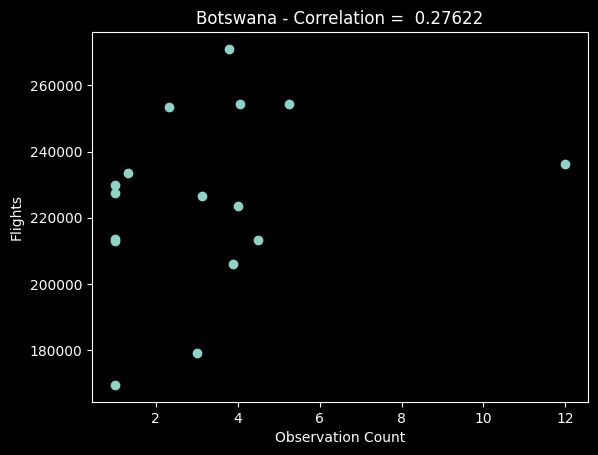

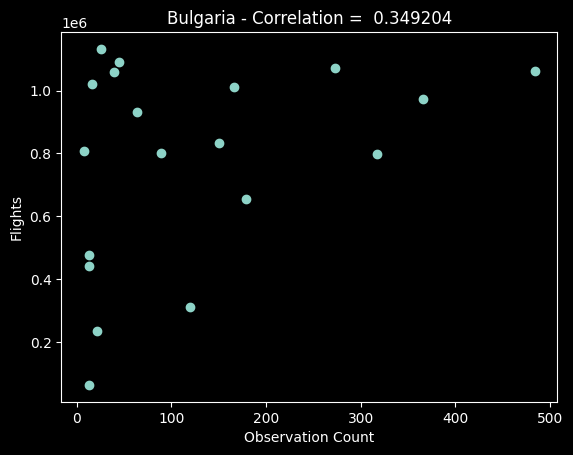

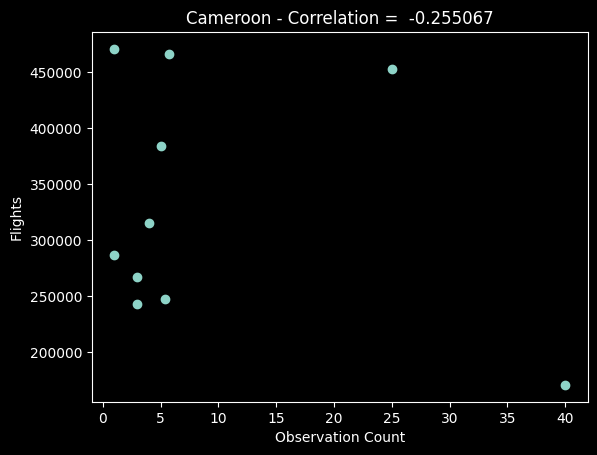

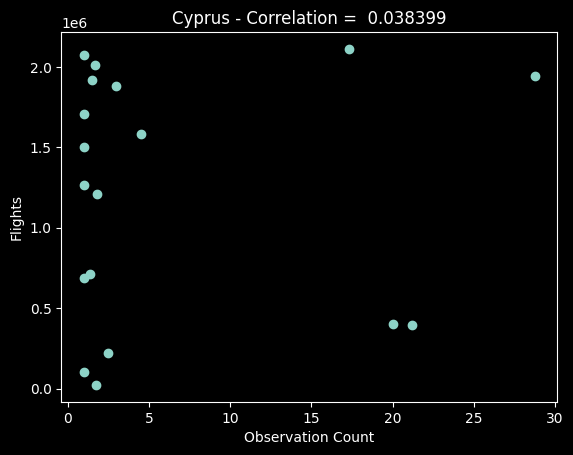

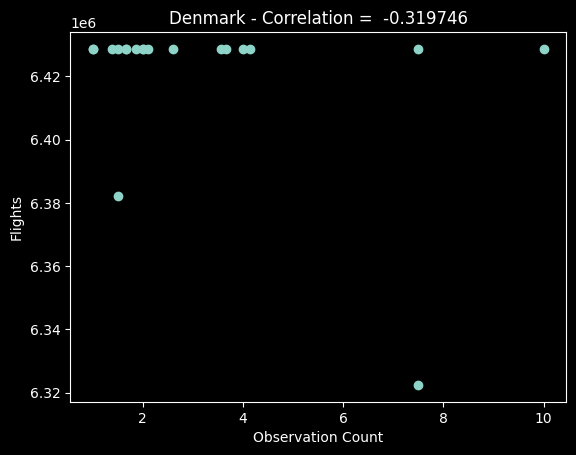

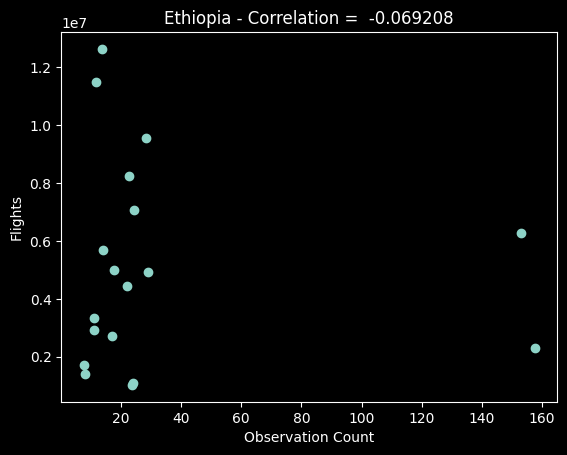

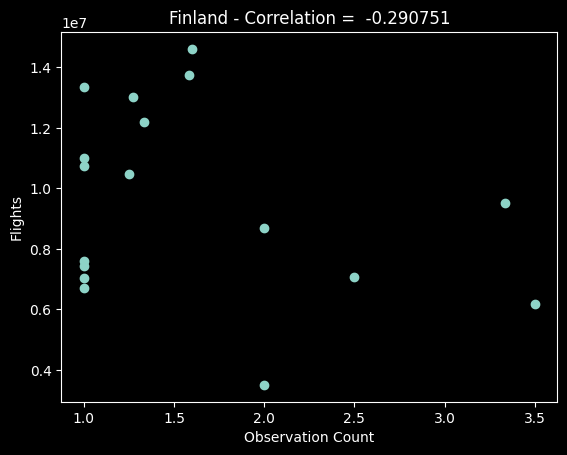

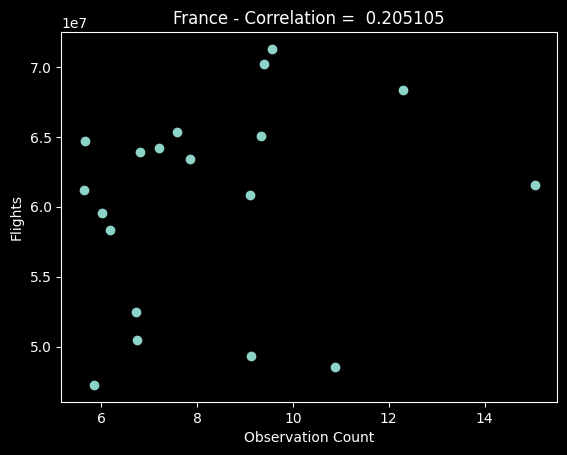

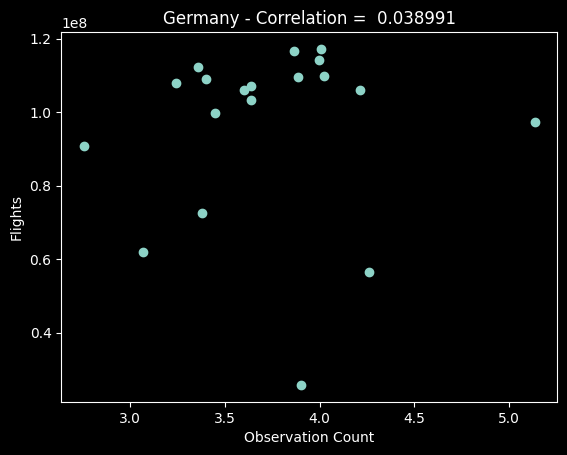

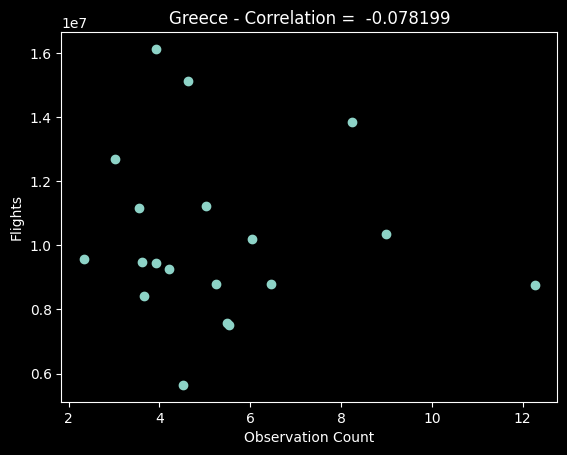

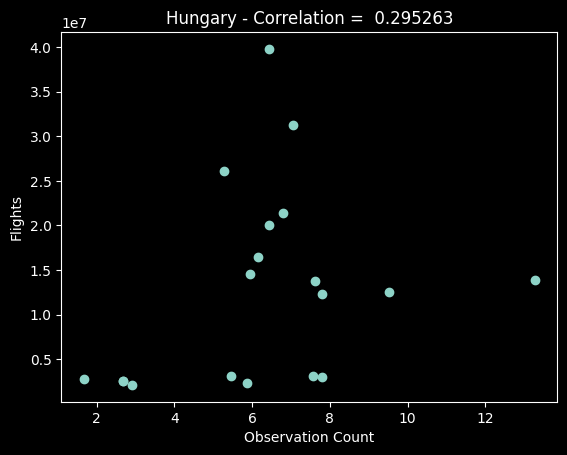

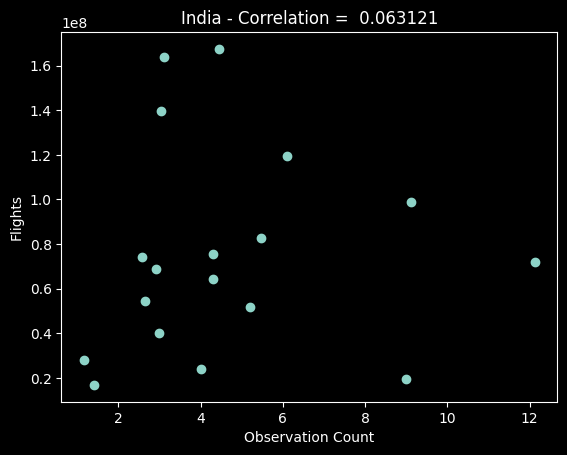

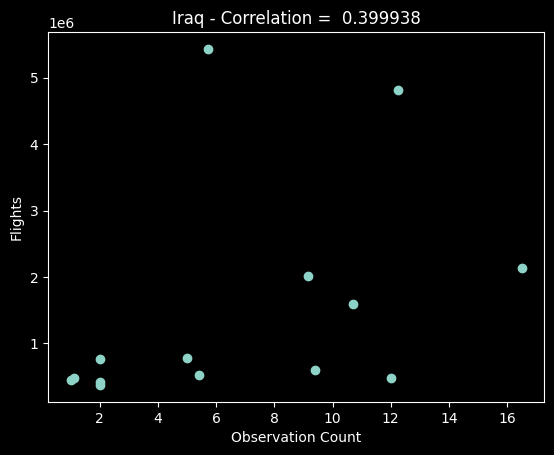

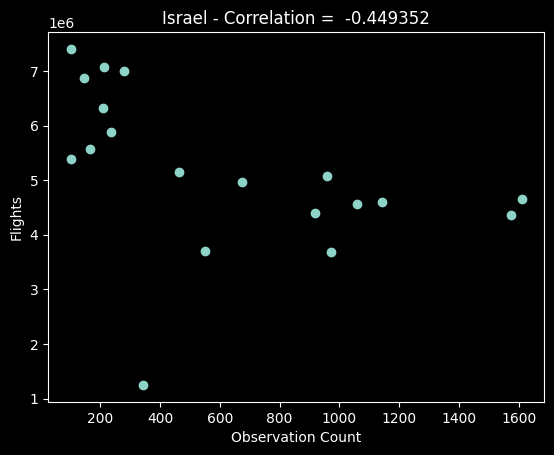

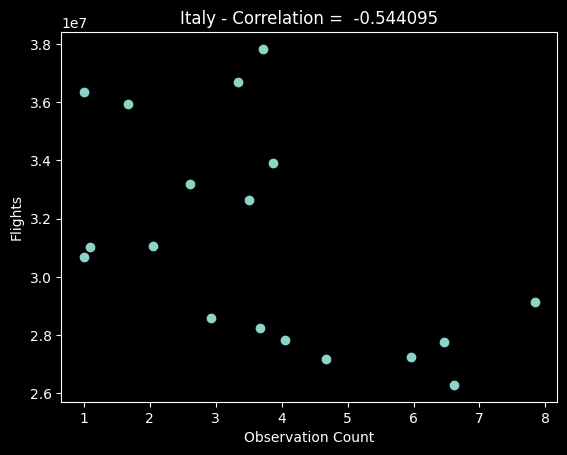

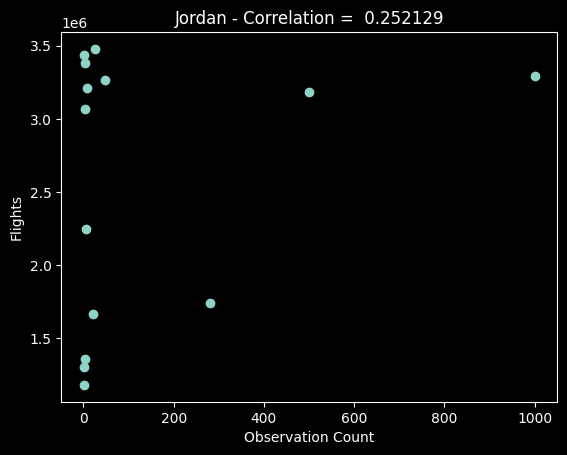

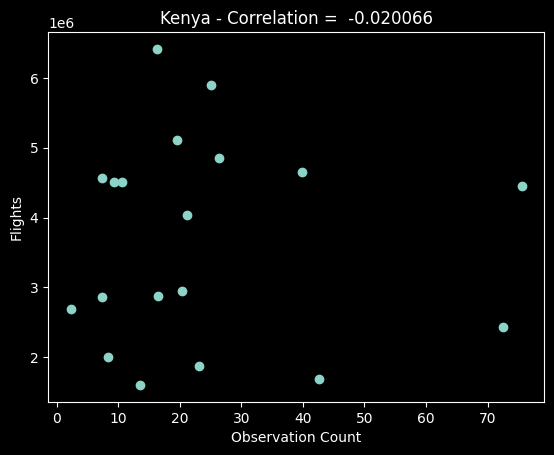

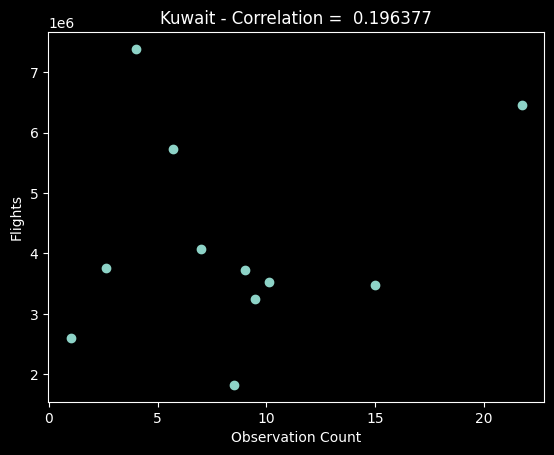

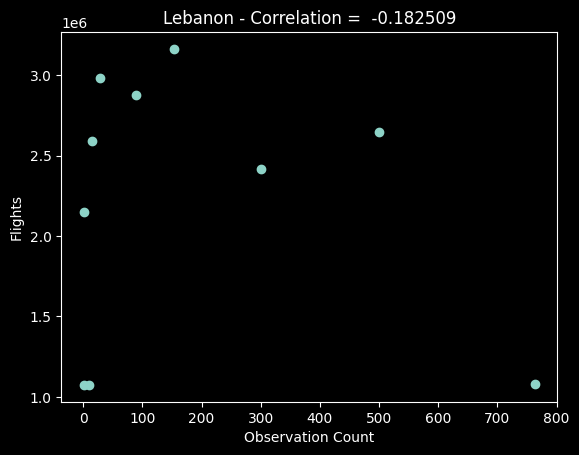

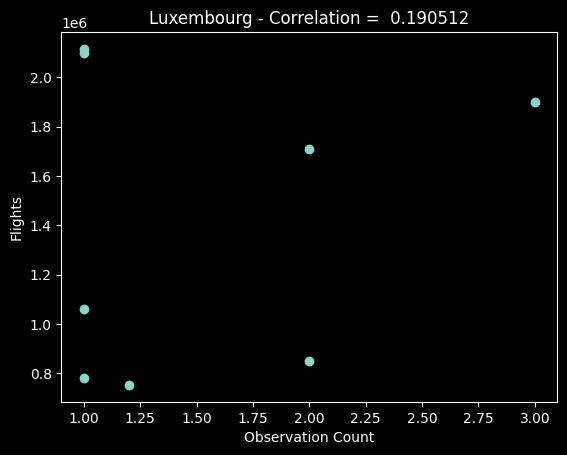

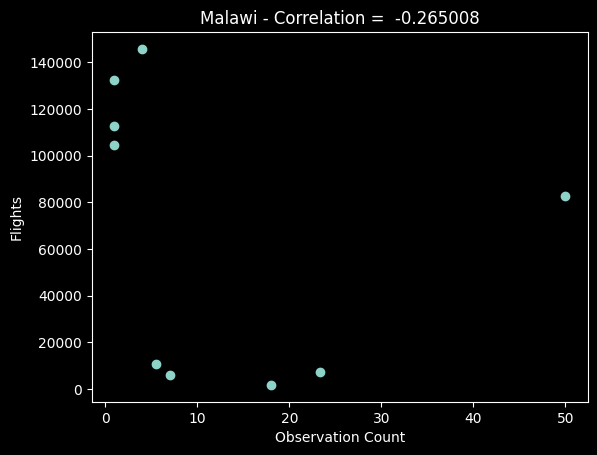

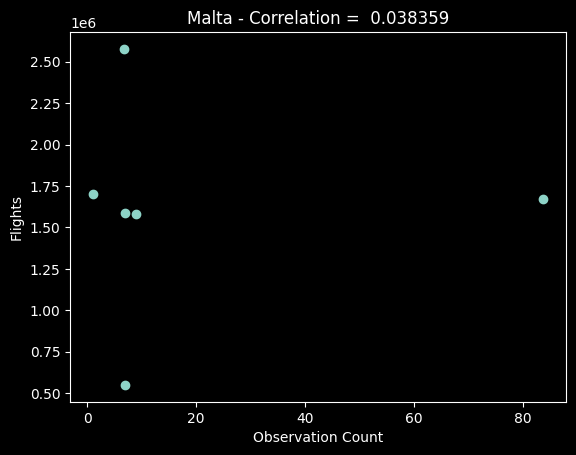

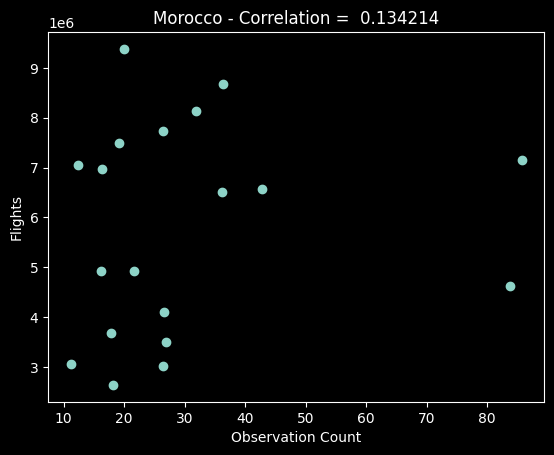

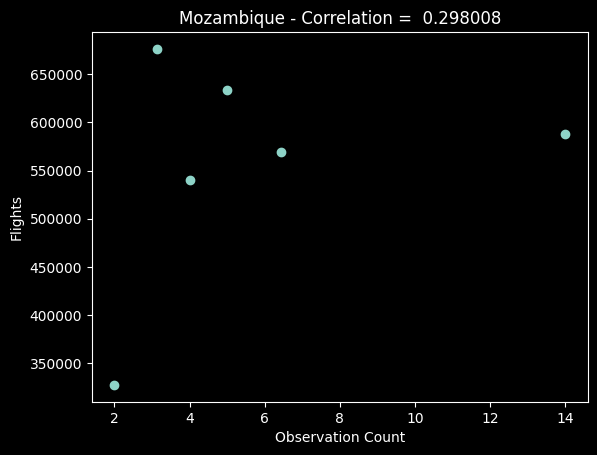

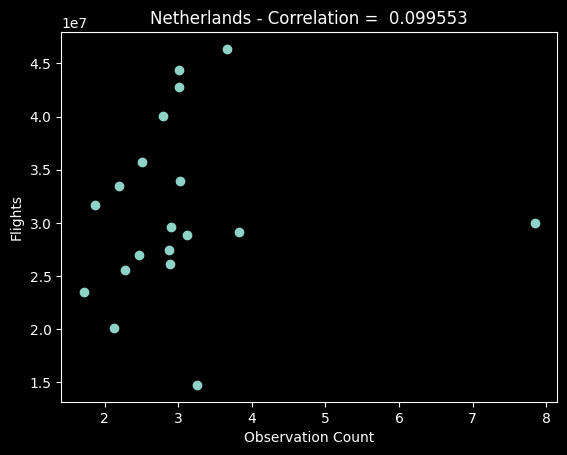

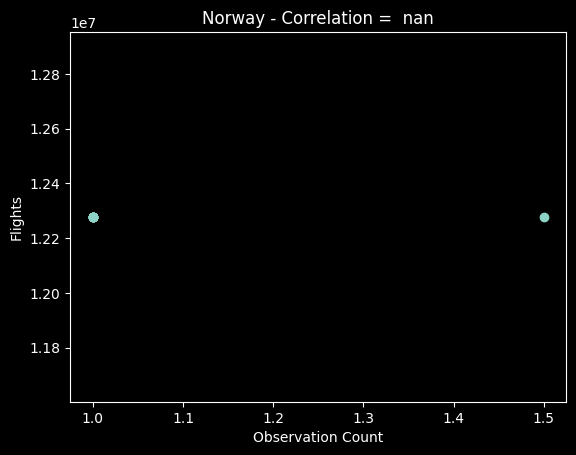

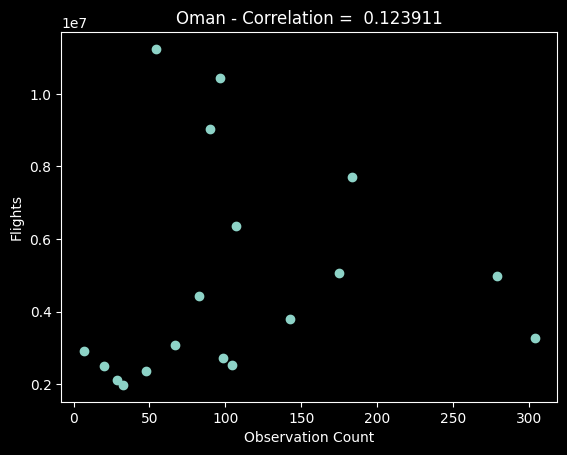

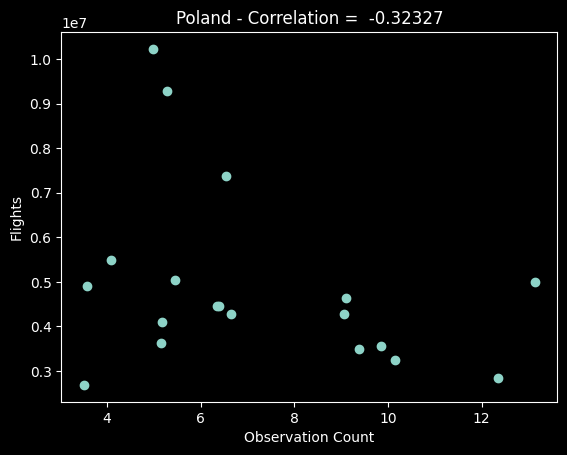

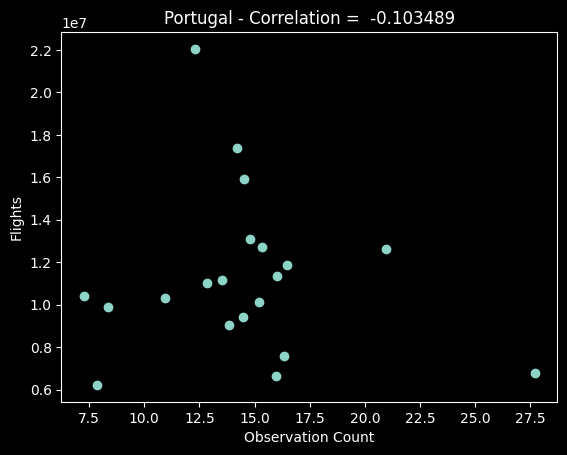

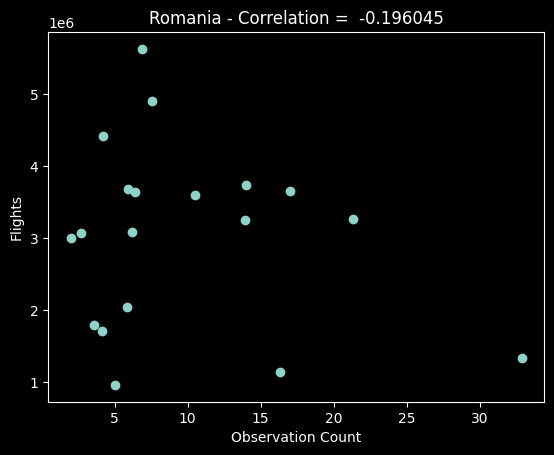

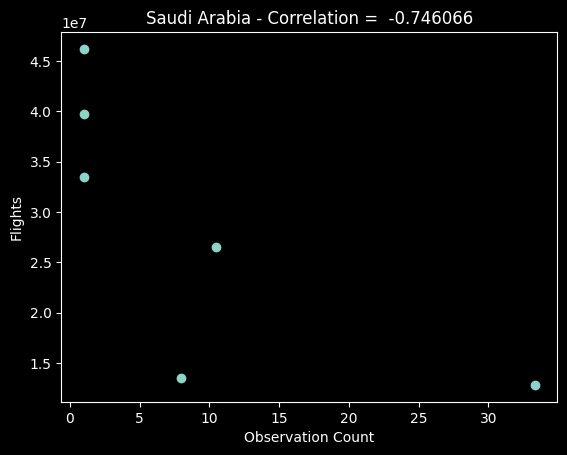

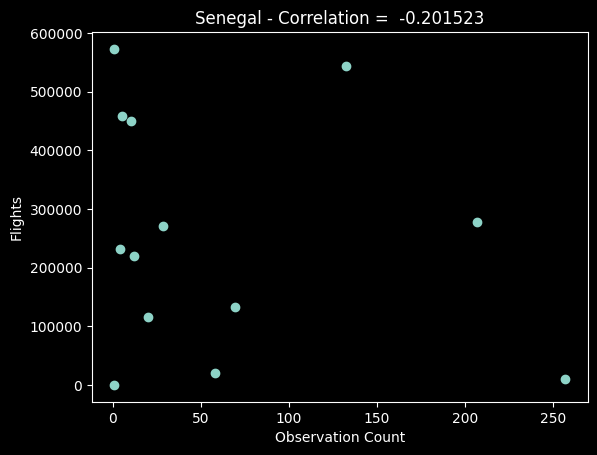

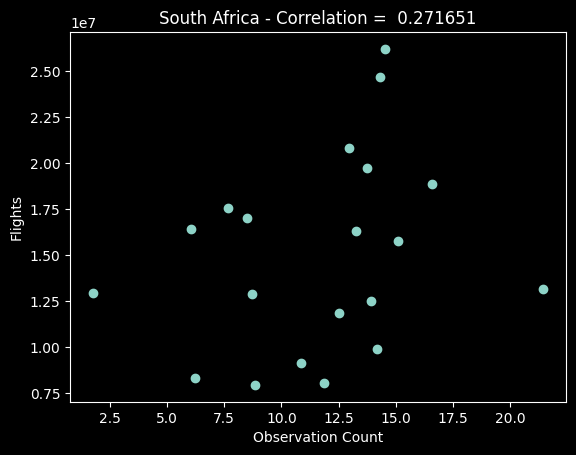

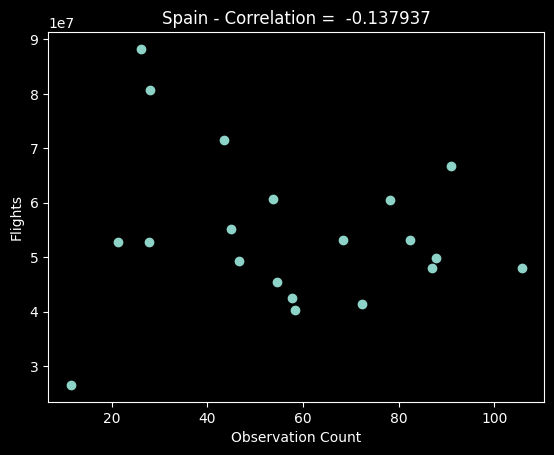

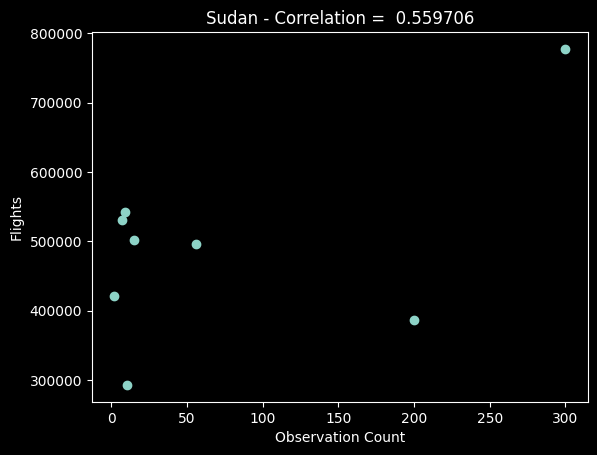

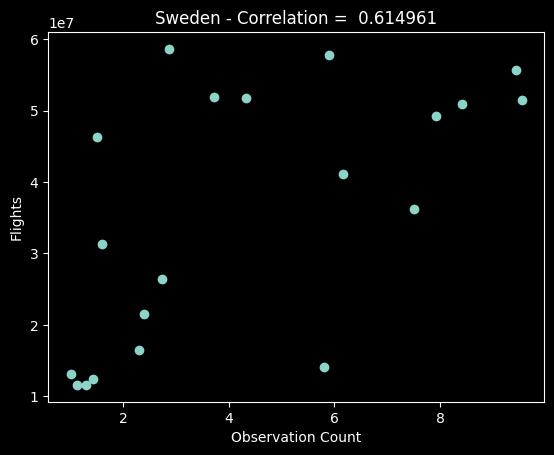

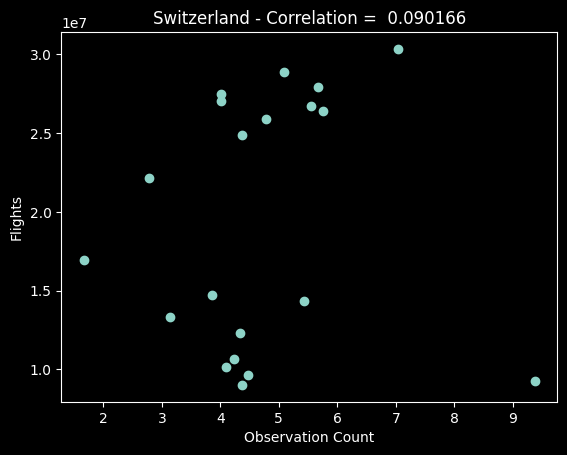

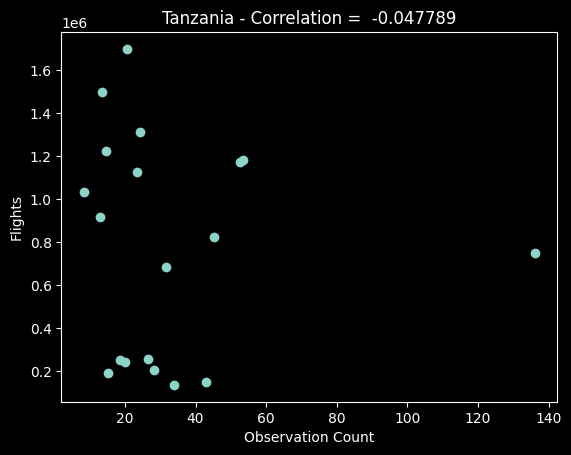

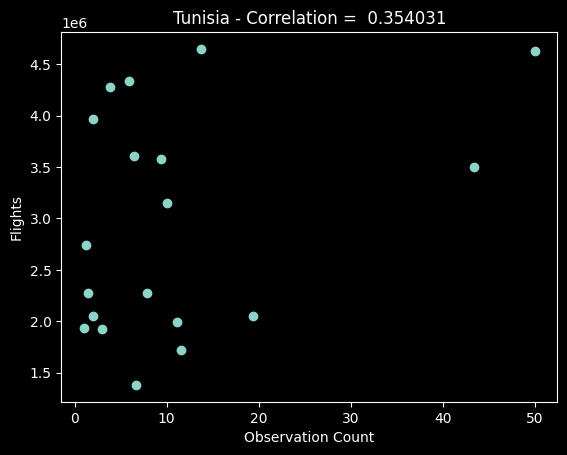

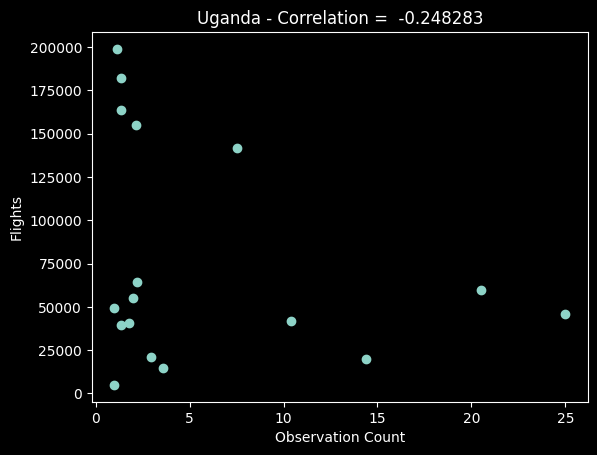

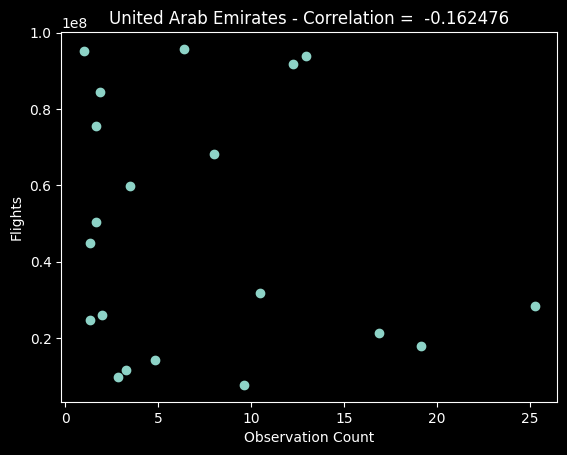

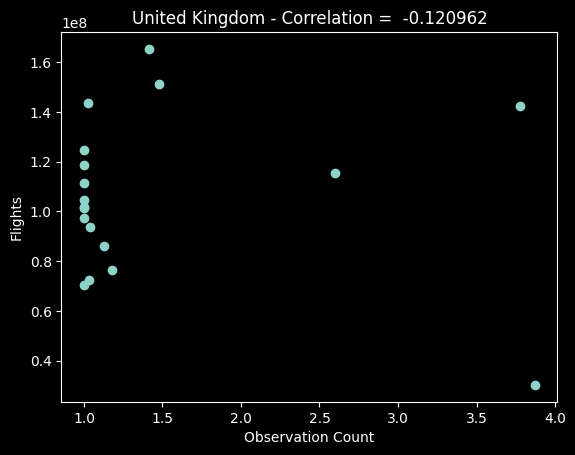

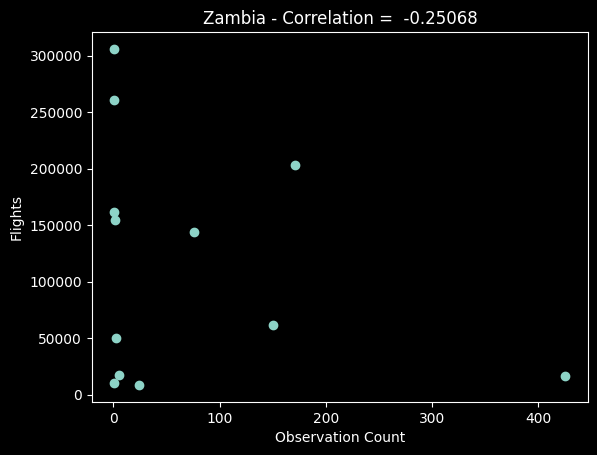

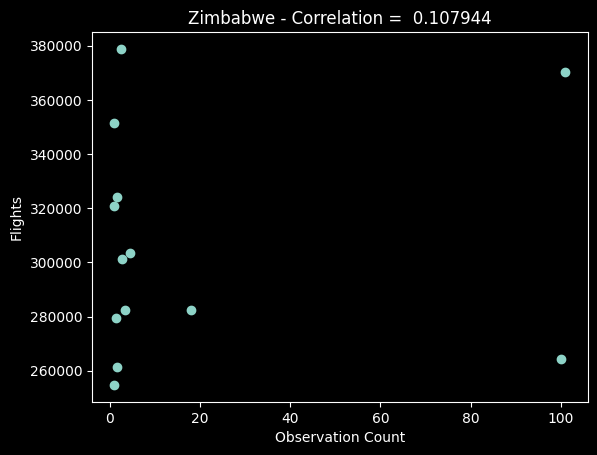

In [301]:
zscore = 3
upper_o = flightstorkdata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").mean()+zscore*flightstorkdata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").std()
lower_o = flightstorkdata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").mean()-zscore*flightstorkdata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").std()
upper_f = flightstorkdata[["COUNTRY","Flights"]].groupby("COUNTRY").mean()+zscore*flightstorkdata[["COUNTRY","Flights"]].groupby("COUNTRY").std()
lower_f = flightstorkdata[["COUNTRY","Flights"]].groupby("COUNTRY").mean()-zscore*flightstorkdata[["COUNTRY","Flights"]].groupby("COUNTRY").std()

corr = {}

for i in flightstorkdata.reset_index()["COUNTRY"].unique():
    plt.figure()
    
    temp = flightstorkdata[(flightstorkdata["COUNTRY"]==i) &
    (flightstorkdata["OBSERVATION COUNT"]<=upper_o["OBSERVATION COUNT"][i]) &
    (flightstorkdata["OBSERVATION COUNT"]>=lower_o["OBSERVATION COUNT"][i]) &
    (flightstorkdata["Flights"]<=upper_f["Flights"][i]) &
    (flightstorkdata["Flights"]>=lower_f["Flights"][i])]

    corr[temp["COUNTRY"].iloc[1]]=round((temp[["OBSERVATION COUNT","Flights"]].corr())[(temp[["OBSERVATION COUNT","Flights"]].corr())["Flights"]!=1]["Flights"]["OBSERVATION COUNT"],6)

    correlationfig = corr[i]
    plt.title(i + " - Correlation =  " + f"{correlationfig}")
    plt.xlabel("Observation Count")
    plt.ylabel("Flights")

    plt.scatter(temp["OBSERVATION COUNT"],temp["Flights"])
    

In [302]:
corr = pd.DataFrame(corr.items())
corr.columns = pd.Index(["Country","Correlation"])

In [303]:
from IPython.display import display
print("Correlation Overall Absolute Average = ",round(corr["Correlation"].abs().mean(),3))
print("Average Negative Correlation = ",corr[corr["Correlation"]<0]["Correlation"].mean())
print("Average Negative Correlation = ",corr[corr["Correlation"]<0]["Correlation"].mean())
#display(corr.sort_values("Correlation",ascending=False).head())
display(corr["Correlation"].mean())

Correlation Overall Absolute Average =  0.234
Average Negative Correlation =  -0.24451273913043475
Average Negative Correlation =  -0.24451273913043475


np.float64(-0.010040413043478257)

In [304]:
flightstorkdata_diff=flightstorkdata[["COUNTRY","OBSERVATION COUNT","Flights"]].groupby("COUNTRY").diff()
flightstorkdata_diff["Country"] = flightstorkdata.reset_index()["COUNTRY"]
flightstorkdata_diff = flightstorkdata_diff.dropna()
flightstorkdata_diff["stork Count per Flight Change"]=flightstorkdata_diff["OBSERVATION COUNT"]/flightstorkdata_diff["Flights"]
flightstorkdata_diff=flightstorkdata_diff.groupby("Country").mean()[["stork Count per Flight Change"]].dropna()
#flightstorkdata_diff.sort_values("stork Count per Flight Change").round(7)*1e6
flightstorkdata_diff.sort_values("stork Count per Flight Change").mean().round(7)*1e6

c:\Users\prabr\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


stork Count per Flight Change   NaN
dtype: float64

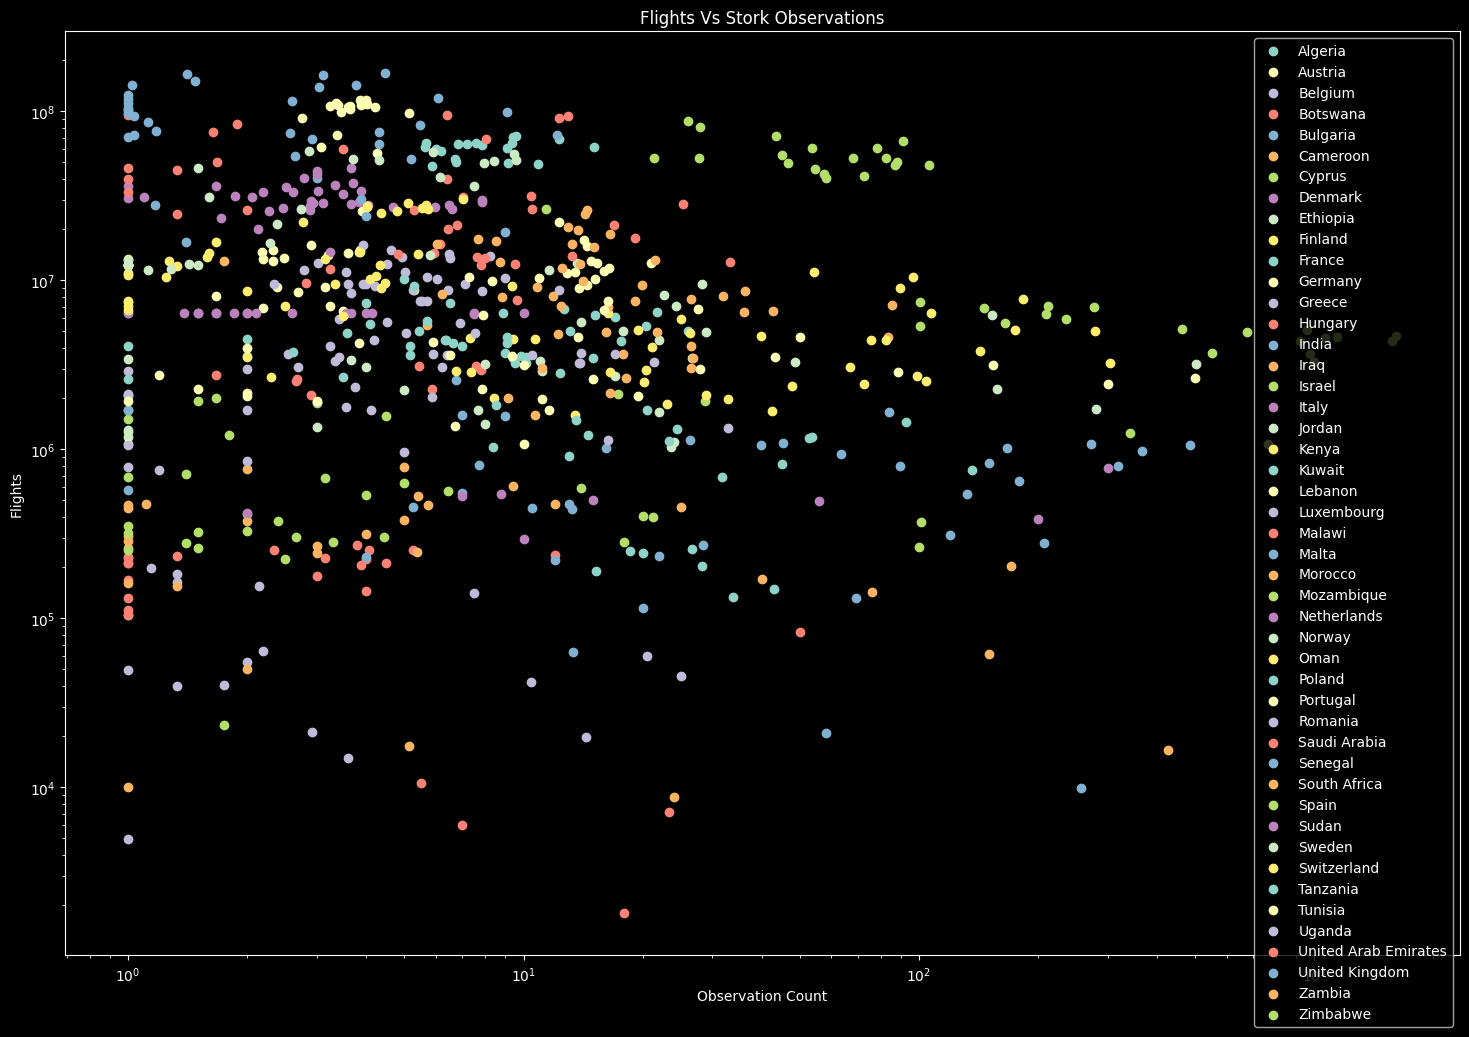

In [305]:
zscore = 3
upper_o = flightstorkdata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").mean()+zscore*flightstorkdata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").std()
lower_o = flightstorkdata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").mean()-zscore*flightstorkdata[["COUNTRY","OBSERVATION COUNT"]].groupby("COUNTRY").std()
upper_f = flightstorkdata[["COUNTRY","Flights"]].groupby("COUNTRY").mean()+zscore*flightstorkdata[["COUNTRY","Flights"]].groupby("COUNTRY").std()
lower_f = flightstorkdata[["COUNTRY","Flights"]].groupby("COUNTRY").mean()-zscore*flightstorkdata[["COUNTRY","Flights"]].groupby("COUNTRY").std()

corr = []

plt.figure(figsize=(18,12))
plt.xscale("log")
plt.yscale("log")

countrylist = flightstorkdata.reset_index()["COUNTRY"].unique()

#countrylist = ["Canada"]

for i in countrylist:
    correlationfig = corrs[corrs["Country"]==i]["Correlation"]
    plt.title("Flights Vs Stork Observations")
    plt.xlabel("Observation Count")
    plt.ylabel("Flights")

    temp = flightstorkdata[(flightstorkdata["COUNTRY"]==i) &
    (flightstorkdata["OBSERVATION COUNT"]<=upper_o["OBSERVATION COUNT"][i]) &
    (flightstorkdata["OBSERVATION COUNT"]>=lower_o["OBSERVATION COUNT"][i]) &
    (flightstorkdata["Flights"]<=upper_f["Flights"][i]) &
    (flightstorkdata["Flights"]>=lower_f["Flights"][i])]

    plt.scatter(temp["OBSERVATION COUNT"],temp["Flights"])
plt.legend(flightstorkdata.reset_index()["COUNTRY"].unique())

C:\Users\prabr\AppData\Local\Temp\ipykernel_7256\3616434656.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = (flightstorkdata.groupby(pd.cut(flightstorkdata['Flights'], list(range(int(flightstorkdata["Flights"].min()),int(flightstorkdata["Flights"].max()),30000000)))).sum()).drop(columns="Flights").reset_index()


Text(0.5, 1.0, 'Stork Count vs Number of Flights')

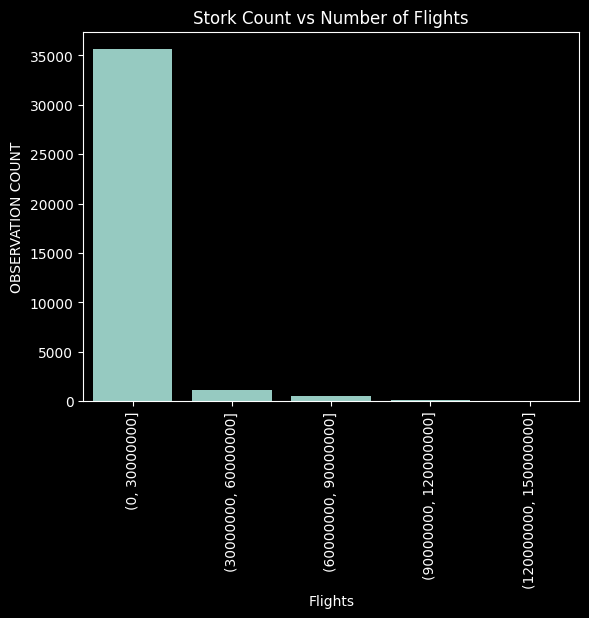

In [306]:
grouped = (flightstorkdata.groupby(pd.cut(flightstorkdata['Flights'], list(range(int(flightstorkdata["Flights"].min()),int(flightstorkdata["Flights"].max()),30000000)))).sum()).drop(columns="Flights").reset_index()

sns.barplot(data=grouped,x="Flights",y="OBSERVATION COUNT")
plt.xticks(rotation=90)
plt.title("Stork Count vs Number of Flights")

Higher flight numbers see less birds

Text(0.5, 0, 'Year')

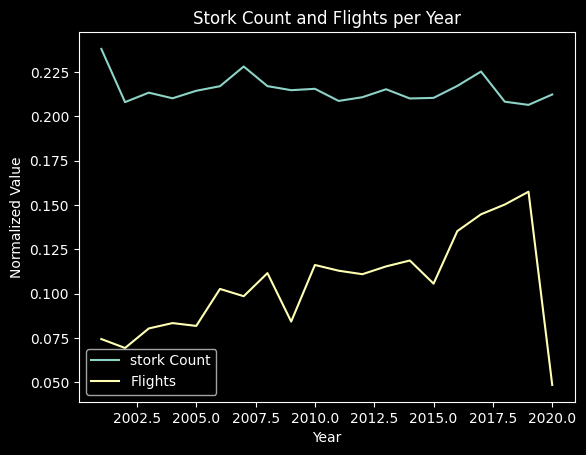

In [307]:
plt.plot(flightstorkdata.groupby("OBSERVATION DATE").mean(numeric_only=True)["OBSERVATION COUNT"]/flightstorkdata["OBSERVATION COUNT"].max()+0.2,label = "stork Count")
plt.plot(flightstorkdata.groupby("OBSERVATION DATE").mean(numeric_only=True)["Flights"]/flightstorkdata["Flights"].max(),label = "Flights")
plt.legend()
plt.title("Stork Count and Flights per Year")
plt.ylabel("Normalized Value")
plt.xlabel("Year")

<h3>TURBINE DATA - COUNT


Need to work out bird population within proximity of the wind turbines

Compare to the bird population when the bird turbine was not there

In [308]:
storkdata_total=storkdata_total[storkdata_total["OBSERVATION DATE"]>LOWERBOUNDYEAR]

In [309]:
storkdata_total.reset_index()["OBSERVATION DATE"].max(),storkdata_total.reset_index()["OBSERVATION DATE"].min()

(np.int32(2020), np.int32(2001))

In [310]:
turbinedata = turbinedata[(turbinedata["Start Year"]<=2024) & (turbinedata["Start Year"]>=LOWERBOUNDYEAR)]

Make the time ranges the same


In [311]:
turbinedata["Start Year"] = turbinedata["Start Year"].astype("int")

In [312]:
turbinedata=turbinedata[turbinedata["Status"]=="Operating"].drop(columns="Status")
turbinedata.head()

,Capacity (MW),Start Year,Latitude,Longitude
0,10.0,2014,28.4624,-0.0576
6,240.0,2018,25.8577,34.4182
7,220.0,2018,25.8577,34.4182
8,120.0,2018,25.8577,34.4182
9,263.0,2019,28.4005,32.9572


Only interested in the turbines that are ready made and able to kill birds

In [313]:
storkdata_total=storkdata_total.drop(columns="COUNTRY")

In [314]:
storkdata_total.head()

,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
0,2,40.813819,-5.705139,2001
1,1,40.813819,-5.705139,2001
2,3,42.212204,-2.180776,2001
3,4,41.728994,-5.595362,2001
8,2,37.439828,-7.768355,2001


<Figure size 640x480 with 0 Axes>

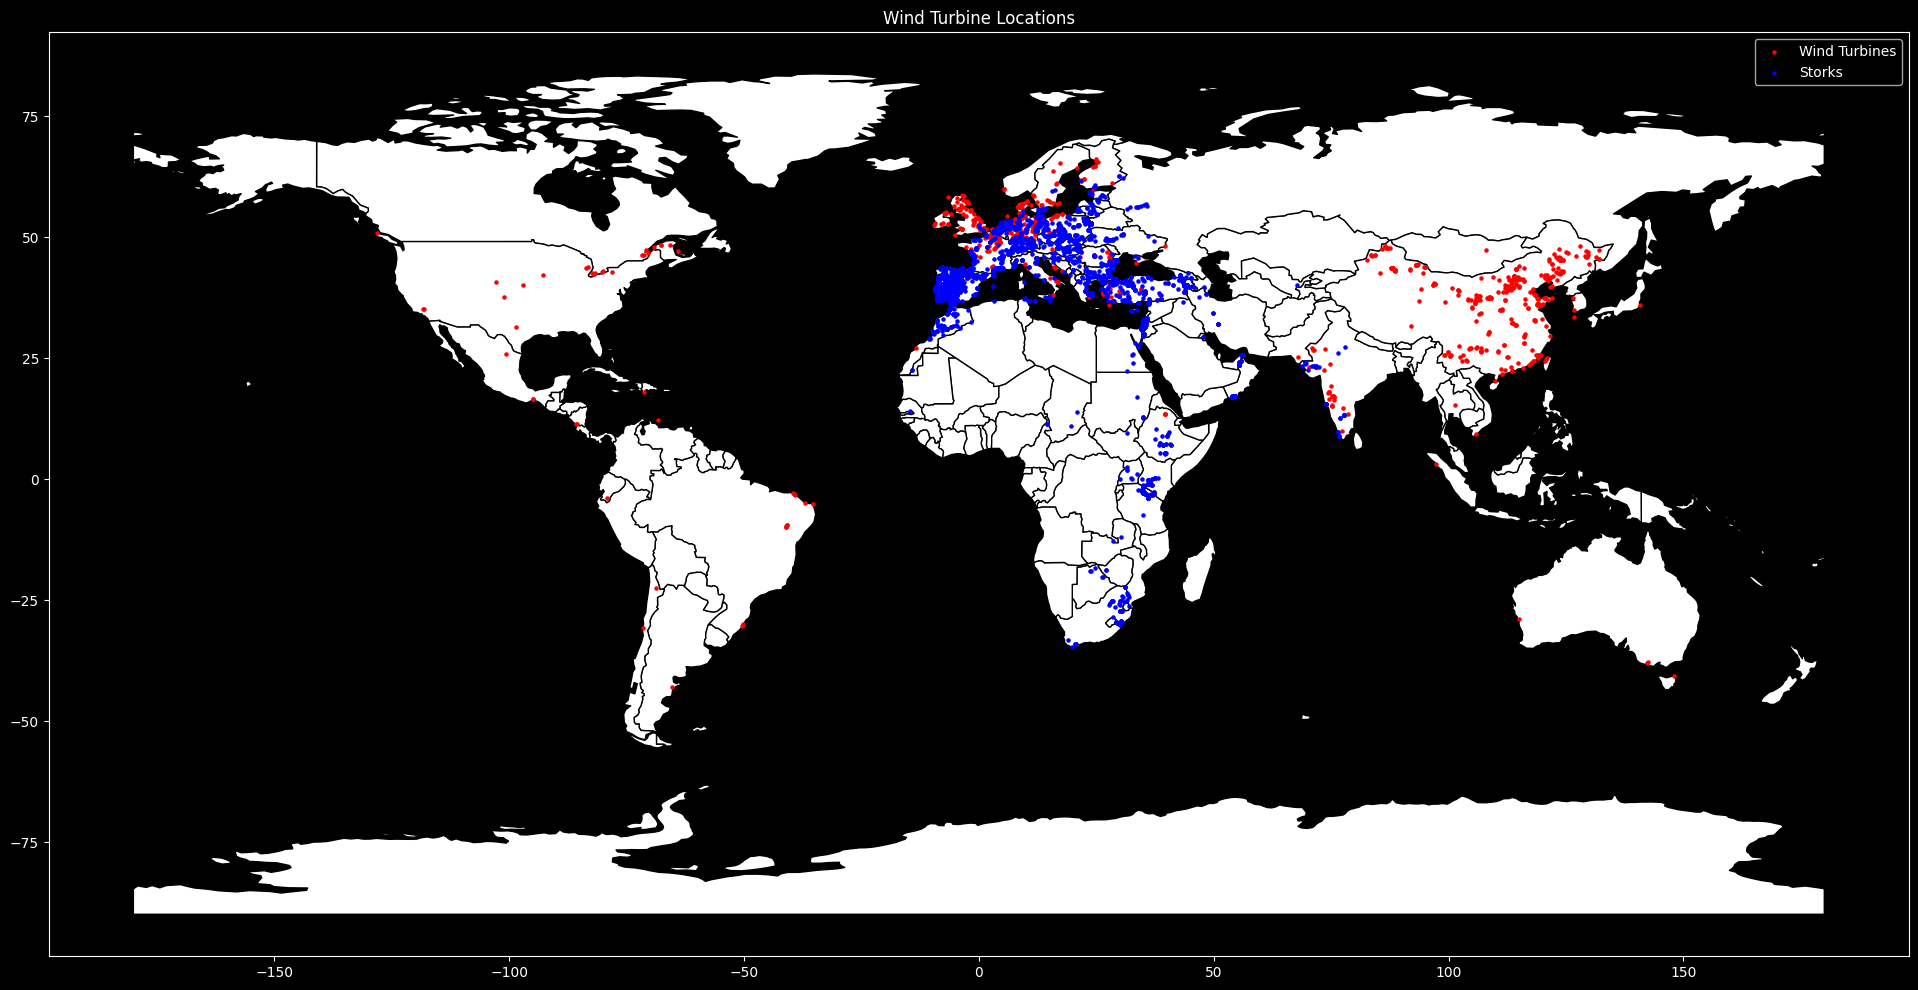

In [315]:


import geopandas as gpd
def turbinestorkplot(year):

    filtered_turbinedata = turbinedata[turbinedata["Start Year"]==year]
    filtered_storkdata_total = storkdata_total[storkdata_total["OBSERVATION DATE"]==year]

    plt.figure()
    url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

    world = gpd.read_file(url)
    ax = world.plot(color="white", edgecolor="black",figsize=(24,16))

    gdf = gpd.GeoDataFrame(filtered_turbinedata,geometry=gpd.points_from_xy(filtered_turbinedata["Longitude"],filtered_turbinedata["Latitude"], crs="EPSG:4326"))
    gdf1 = gpd.GeoDataFrame(filtered_storkdata_total,geometry=gpd.points_from_xy(filtered_storkdata_total["LONGITUDE"],filtered_storkdata_total["LATITUDE"], crs="EPSG:4326"))

    plt.title("Wind Turbine Locations")
    gdf.plot(ax=ax,color="red",markersize=5)
    gdf1.plot(ax=ax,color="blue",markersize=5)
    plt.legend(["Wind Turbines","Storks"])
    plt.show()
    
year = 2013
"""for i in range(2015,2024):
    turbinestorkplot(i)"""
turbinestorkplot(year)

In [316]:
turbinesperyear = turbinedata.groupby("Start Year").count()[["Capacity (MW)"]].loc[1:].reset_index().set_index("Start Year").rename(columns={"Capacity (MW)":"Wind Turbine Count"})
storkdataperyear = storkdata_total.reset_index().groupby("OBSERVATION DATE").sum(numeric_only=True).reset_index().set_index("OBSERVATION DATE")

In [317]:
turbinestorkperyear = turbinesperyear.join(storkdataperyear,on="Start Year").reset_index().dropna().drop(columns="index")
turbinestorkperyear.head()

,Start Year,Wind Turbine Count,OBSERVATION COUNT,LATITUDE,LONGITUDE
1,2001,141,308260.0,45383.593594,13359.335055
2,2002,161,101547.0,42238.318673,10273.812544
3,2003,201,204032.0,42877.696705,13502.857042
4,2004,176,166675.0,78812.319234,22498.553072
5,2005,245,440684.0,76045.992050,29256.599984


Correlation =  0.62622624140813


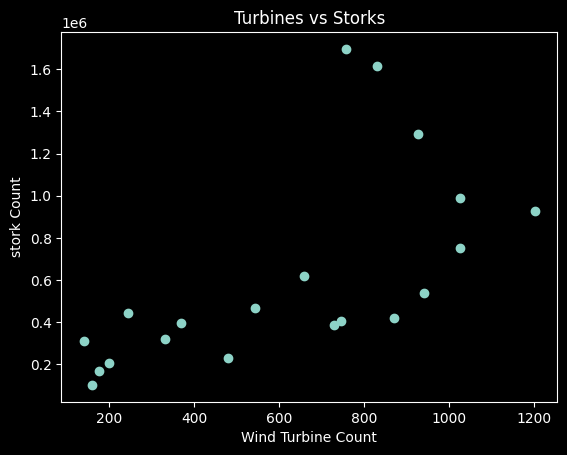

In [318]:
plt.title("Turbines vs Storks")
plt.scatter(data=turbinestorkperyear,x="Wind Turbine Count",y="OBSERVATION COUNT")
plt.xlabel("Wind Turbine Count")
plt.ylabel("stork Count")
print("Correlation = ",turbinestorkperyear[["Wind Turbine Count","OBSERVATION COUNT"]].corr().iloc[1,0])

Overall thorughout all data, theres no correlation

Correlation =  nan


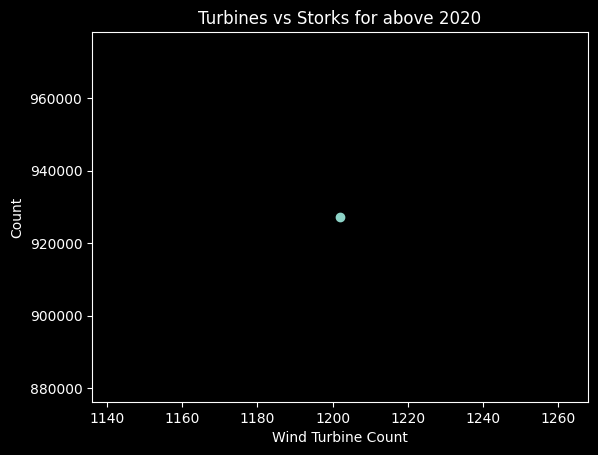

In [319]:
turbinestorkperyear_recent = turbinestorkperyear[turbinestorkperyear["Start Year"]>=2020]
plt.title("Turbines vs Storks for above 2020")
plt.scatter(data=turbinestorkperyear_recent,x="Wind Turbine Count",y="OBSERVATION COUNT")
plt.xlabel("Wind Turbine Count")
plt.ylabel("Count")
print("Correlation = ",turbinestorkperyear_recent[["Wind Turbine Count","OBSERVATION COUNT"]].corr().iloc[1,0])

However past 2020, more turbines have meant less storks

In [320]:
turbinestorkperyear_diff = turbinestorkperyear[["Start Year","Wind Turbine Count","OBSERVATION COUNT"]].diff().drop(columns="Start Year").dropna()
(turbinestorkperyear_diff["OBSERVATION COUNT"]/turbinestorkperyear_diff["Wind Turbine Count"]).mean()


np.float64(-12729.06989116936)

,Start Year,Wind Turbine Count,OBSERVATION COUNT,LATITUDE,LONGITUDE
19,2019,831,1617944.0,1.888908e+06,123153.587876


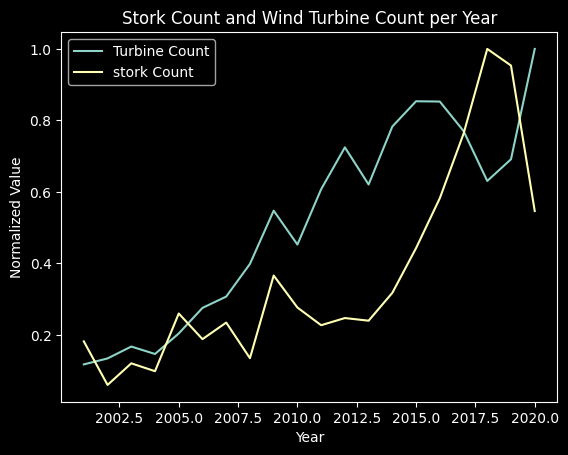

In [321]:
plt.plot(turbinestorkperyear.set_index("Start Year")["Wind Turbine Count"]/turbinestorkperyear.set_index("Start Year")["Wind Turbine Count"].max(),label="Turbine Count")
plt.plot(turbinestorkperyear.set_index("Start Year")["OBSERVATION COUNT"]/turbinestorkperyear.set_index("Start Year")["OBSERVATION COUNT"].max(),label="stork Count")
plt.legend()
plt.title("Stork Count and Wind Turbine Count per Year")
plt.xlabel("Year")
plt.ylabel("Normalized Value")

turbinestorkperyear[turbinestorkperyear["Start Year"]==2019]

<h3>TURBINE COUNT - PROXIMITY

In [322]:
from IPython.display import display

storkdata_total_sorted = storkdata_total.sort_values(["LATITUDE","LONGITUDE"])
display(storkdata_total_sorted.head()),display(storkdata_total_sorted.tail())

,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
8523,2,-34.832380,20.006604,2004
72032,2,-34.832380,20.006604,2015
48085,5,-34.732302,19.841137,2013
32871,20,-34.727129,19.912170,2011
100096,500,-34.727129,19.912170,2017


,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
52410,1,63.700180,9.639915,2014
88509,1,63.720560,9.621090,2016
8585,1,64.171473,26.079998,2005
232668,1,64.807158,25.995117,2020
13082,1,64.814500,25.936700,2006


(None, None)

In [323]:
turbinedata_sorted = turbinedata.sort_values(["Latitude","Longitude"])
display(turbinedata_sorted.head()),display(turbinedata_sorted.tail())

,Capacity (MW),Start Year,Latitude,Longitude
1405,10.0,2020,-52.9361,-70.8288
181,101.0,2019,-47.2995,-66.9931
182,25.0,2019,-47.2995,-66.9931
209,97.0,2021,-46.6343,-68.3925
184,122.0,2021,-46.5925,-67.6486


,Capacity (MW),Start Year,Latitude,Longitude
12500,54.0,2012,70.1006,20.1058
12508,52.0,2017,70.6679,29.7190
12542,45.0,2014,70.7657,29.0833
12543,52.0,2022,70.7657,29.0833
12522,39.0,2006,70.9185,27.2899


(None, None)

Range will be (25,39) to (70,28)

In [324]:
csort = storkdata_total_sorted[(storkdata_total_sorted["LATITUDE"]>25) & (storkdata_total_sorted["LATITUDE"]<70)
& (storkdata_total_sorted["LONGITUDE"]<39) & (storkdata_total_sorted["LONGITUDE"]>28)]

In [325]:
tsort = turbinedata_sorted[(turbinedata_sorted["Latitude"]>25) & (turbinedata_sorted["Latitude"]<70)
& (turbinedata_sorted["Longitude"]<39) & (turbinedata_sorted["Longitude"]>28)]

Merge on latitude as theres more variation

In [326]:
import numpy as np

locdata = pd.merge_asof(csort,tsort,direction="nearest",left_on="LATITUDE",right_on="Latitude") #paired by location

#locdata=locdata.drop(columns=["LATITUDE","LONGITUDE","Latitude","Longitude"])

locdata = locdata[locdata["OBSERVATION DATE"]>locdata["Start Year"]]
locdata["Distance"] = np.sqrt((locdata["LONGITUDE"]-locdata["Longitude"])**2+((locdata["LATITUDE"]-locdata["Latitude"]))**2) #defines distance from turbine
locdata
locdata = locdata.drop(columns=["LATITUDE","LONGITUDE","Latitude","Longitude"])
locdata = locdata[(locdata["OBSERVATION COUNT"]>25)] #remove small and mega large observations that skew data
locdata = locdata[(locdata["OBSERVATION COUNT"]<1000)]
locdata

,OBSERVATION COUNT,OBSERVATION DATE,Capacity (MW),Start Year,Distance
16,600,2020,240.0,2018,1.772880
17,600,2020,240.0,2018,1.772880
759,685,2020,263.0,2019,0.149394
760,685,2020,263.0,2019,0.149394
782,30,2006,30.0,2000,1.782730
...,...,...,...,...,...
18472,84,2017,22.0,2001,4.576408
18701,33,2020,32.0,2019,1.853723
18702,33,2020,32.0,2019,1.853723
18703,33,2020,32.0,2019,1.853723


Text(0.5, 1.0, 'Count vs Distance')

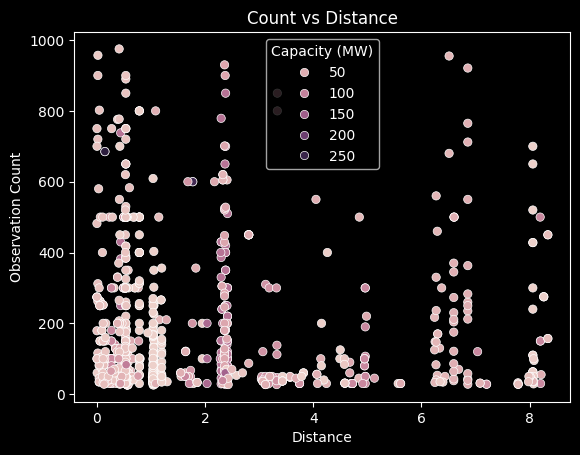

In [327]:
import seaborn as sns

sns.scatterplot(x=locdata["Distance"],y=locdata["OBSERVATION COUNT"],hue=locdata["Capacity (MW)"])
plt.xlabel("Distance")
plt.ylabel("Observation Count")
plt.title("Count vs Distance")

Text(0.5, 1.0, 'Count vs Distance for large fans')

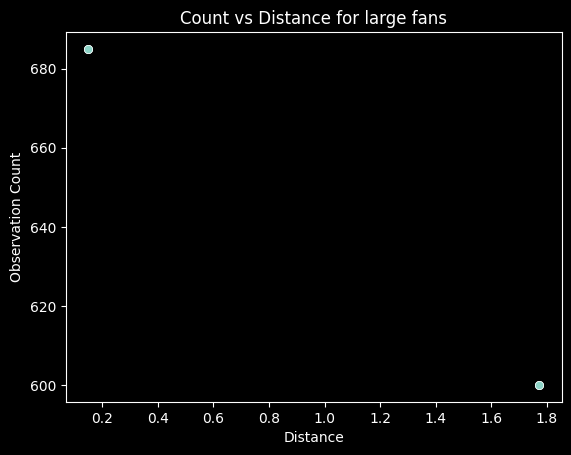

In [328]:
sns.scatterplot(x=locdata[locdata["Capacity (MW)"]>200]["Distance"],y=locdata[locdata["Capacity (MW)"]>200]["OBSERVATION COUNT"])
plt.xlabel("Distance")
plt.ylabel("Observation Count")
plt.title("Count vs Distance for large fans")

Text(0.5, 1.0, 'Count vs Distance')

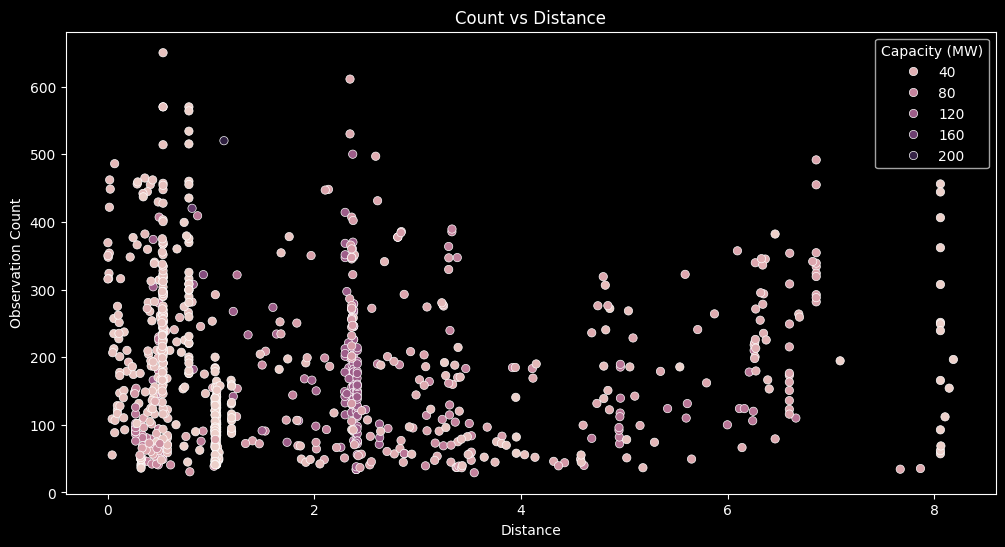

In [329]:
import seaborn as sns
smoothing = 5

plt.figure(figsize=(12,6))
sns.scatterplot(x=locdata["Distance"].rolling(smoothing).mean(),y=locdata["OBSERVATION COUNT"].rolling(smoothing).mean(),hue=locdata["Capacity (MW)"].rolling(smoothing).mean())
plt.xlabel("Distance")
plt.ylabel("Observation Count")
plt.title("Count vs Distance")
#plt.axis([0,1.5,0,400])

In [330]:
locdata.groupby("Distance").sum(numeric_only=True)["OBSERVATION COUNT"].reset_index()

,Distance,OBSERVATION COUNT
0,0.002373,2507
1,0.003153,900
2,0.006225,60
3,0.019249,2310
4,0.020384,957
...,...,...
272,8.199991,300
273,8.202922,30
274,8.212101,55
275,8.261104,825


Text(0.5, 1.0, 'Obsevation Count Data Skew')

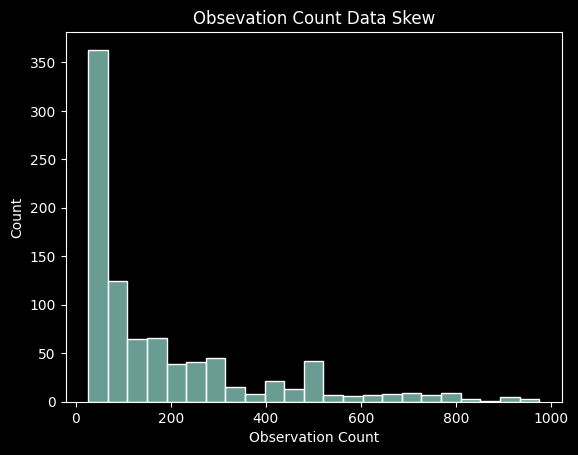

In [331]:
#sns.histplot(data=locdata[locdata["Distance"]<1.5],x="Distance",y="OBSERVATION COUNT")
sns.histplot(x=locdata["OBSERVATION COUNT"])
plt.xlabel("Data Point Count")
plt.xlabel("Observation Count")
plt.title("Obsevation Count Data Skew")

obvious data skew. need to sum each bin on a barplot to make any sense of this

C:\Users\prabr\AppData\Local\Temp\ipykernel_7256\804462729.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = (locdata.groupby(pd.cut(locdata['Distance'], [0,1,2,3,4,5,6,7,8,9,10])).sum()).drop(columns="Distance").reset_index()


Text(0.5, 1.0, 'Stork Count vs Stork Distance')

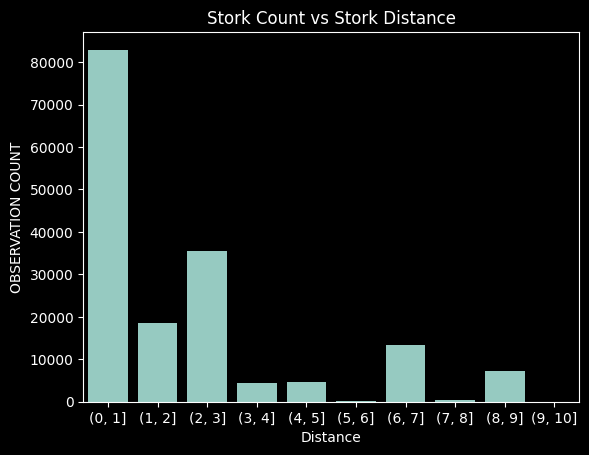

In [332]:
grouped = (locdata.groupby(pd.cut(locdata['Distance'], [0,1,2,3,4,5,6,7,8,9,10])).sum()).drop(columns="Distance").reset_index()

sns.barplot(data=grouped,x="Distance",y="OBSERVATION COUNT")
plt.title("Stork Count vs Stork Distance")

<Axes: xlabel='Distance', ylabel='OBSERVATION COUNT'>

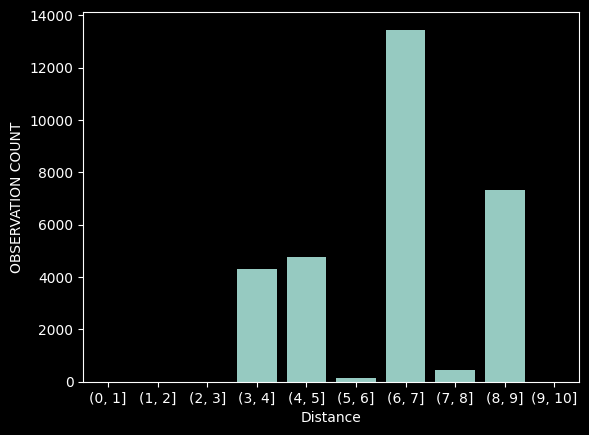

In [333]:
sns.barplot(data=grouped.drop(index=[0,1,2]),x="Distance",y="OBSERVATION COUNT")

In [334]:
locdata[["OBSERVATION COUNT","Distance"]].corr()

,OBSERVATION COUNT,Distance
OBSERVATION COUNT,1.000000,-0.021389
Distance,-0.021389,1.000000


Do correlation by country

Continue work